In [1]:
import math
import itertools
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Trabajo profesional/Code/data/prod_merge_2024-05-18_23:34:00.csv", index_col=0, low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295479 entries, 0 to 295478
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   idempresa                295478 non-null  object 
 1   anio                     295478 non-null  float64
 2   mes                      295478 non-null  float64
 3   idpozo                   295479 non-null  int64  
 4   prod_pet                 295478 non-null  float64
 5   prod_gas                 295478 non-null  float64
 6   prod_agua                295478 non-null  float64
 7   tef                      295478 non-null  float64
 8   tipoextraccion           295479 non-null  object 
 9   tipoestado               295479 non-null  object 
 10  tipopozo                 295479 non-null  object 
 11  empresa                  295478 non-null  object 
 12  formprod                 295478 non-null  object 
 13  profundidad              295478 non-null  float64
 14  areapermi

In [4]:
data.dropna(subset=['anio', 'mes'], inplace=True)
data['anio'] = data['anio'].astype('int')
data['mes'] = data['mes'].astype('int')
data.insert(1, "fecha", data[["anio", "mes"]].apply(lambda r: datetime(r.anio, r.mes, 1), axis=1))
data.insert(5, 'tipopozo', data.pop('tipopozo'))
data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

idempresa      fecha  anio  mes  idpozo     tipopozo  prod_pet   prod_gas  \
0       TPT 2006-01-01  2006    1    8043     Gasífero     0.000     0.0000   
1       CHE 2006-01-01  2006    1   10073  Petrolífero    41.300  2043.5900   
2       PBE 2006-01-01  2006    1   11191     Gasífero     8.034   162.0700   
3       TPT 2006-01-01  2006    1   11641     Gasífero     0.000   186.3109   
4       TPT 2006-01-01  2006    1   11642     Gasífero     0.000   158.0239   

   prod_agua       tef             tipoextraccion           tipoestado  \
0        0.0   0.00000  Sin Sistema de Extracción    En Reserva de Gas   
1      101.0  31.00000          Surgencia Natural  Extracción Efectiva   
2        0.0  14.48958          Surgencia Natural  Extracción Efectiva   
3        0.0  27.00000          Surgencia Natural  Extracción Efectiva   
4        0.0  27.00000          Surgencia Natural  Extracción Efectiva   

                    empresa formprod  profundidad  \
0            TECPETROL S.A.     VMUT       3243.0   
1  CHEVRON ARGENTINA S.R.L.     LAJA       3850.0   
2  PETROBRAS ARGENTINA S.A.     MAGA       3186.0   
3            TECPETROL S.A.     LAJA       3250.0   
4            TECPETROL S.A.     LAJA       2618.0   

             areapermisoconcesion      areayacimiento    cuenca   provincia  \
0               FORTIN DE PIEDRA     FORTIN DE PIEDRA  NEUQUINA     Neuquén   
1                      LOMA NEGRA       LOMA DE MARÍA  NEUQUINA   Rio Negro   
2  CAMPO INDIO ESTE - EL CERRITO          CAMPO INDIO   AUSTRAL  Santa Cruz   
3                 PUNTA SENILLOSA  PUNTA SENILLOSA NC  NEUQUINA     Neuquén   
4                 PUNTA SENILLOSA  PUNTA SENILLOSA NC  NEUQUINA     Neuquén   

   coordenadax  coordenaday clasificacion subclasificacion sub_tipo_recurso  \
0   -69.038885   -38.508198   EXPLORACION      EXPLORACION            SHALE   
1   -67.669980   -38.832360   EXPLOTACION         AVANZADA            TIGHT   
2   -70.711327   -50.804903  No informado     No informado            TIGHT   
3   -68.577655   -38.876143   EXPLOTACION       DESARROLLO            TIGHT   
4   -68.610041   -38.866561   EXPLOTACION       DESARROLLO            TIGHT   

     cota adjiv_fecha_inicio_perf adjiv_fecha_fin_perf  \
0  463.40              1981-04-23           1981-07-10   
1  456.30              2001-01-21           2001-03-03   
2  311.99                     NaN                  NaN   
3  593.40              2001-05-19           2001-07-10   
4  664.00              2001-11-04           2001-12-12   

  adjiv_fecha_inicio_term adjiv_fecha_fin_term  \
0              1981-07-17           1981-08-27   
1              2001-04-12           2001-04-26   
2                     NaN                  NaN   
3              2001-09-20           2001-09-20   
4              2003-06-17           2003-06-23   

                                             geojson  \
0  {"type":"Point","coordinates":[-69.03888539999...   
1  {"type":"Point","coordinates":[-67.66997999999...   
2  {"type":"Point","coordinates":[-70.71132706999...   
3  {"type":"Point","coordinates":[-68.57765539999...   
4  {"type":"Point","coordinates":[-68.61004090000...   

                                                geom  adjiv_capacidad_perf  \
0  0101000020E6100000AE5230197D4251C0EEF3739E0C41...                   0.0   
1  0101000020E6100000573ECBF3E0EA50C0D13FC1C58A6A...                4000.0   
2  0101000020E6100000359AF96186AD51C0D3E77A0D0767...                   NaN   
3  0101000020E6100000E6D65A4EF82451C0B10F57732570...                   0.0   
4  0101000020E61000003CAEFCE80A2751C0C3FD367AEB6E...                   0.0   

  adjiv_fecha_abandono  adjiv_comp_perf  
0                  NaN              0.0  
1                  NaN              0.0  
2                  NaN              NaN  
3                  NaN              2.0  
4                  NaN             12.0

In [5]:
data.describe(percentiles=[.25, .5, .75, .95])

fecha           anio            mes  \
count                         295478  295478.000000  295478.000000   
mean   2019-07-31 13:35:48.732562176    2019.125008       6.470742   
min              2006-01-01 00:00:00    2006.000000       1.000000   
25%              2017-08-01 00:00:00    2017.000000       3.000000   
50%              2020-05-01 00:00:00    2020.000000       6.000000   
75%              2022-07-01 00:00:00    2022.000000      10.000000   
95%              2023-12-01 00:00:00    2023.000000      12.000000   
max              2024-03-01 00:00:00    2024.000000      12.000000   
std                              NaN       3.714703       3.500565   

              idpozo       prod_pet       prod_gas      prod_agua  \
count  295478.000000  295478.000000  295478.000000  295478.000000   
mean   148632.567365     245.565831     630.258972     141.418122   
min      3640.000000      -0.001000     -12.267000       0.000000   
25%    145386.000000       0.000000       8.840000       0.000000   
50%    154836.000000       6.440000     113.164650      11.535545   
75%    158894.000000      76.030000     498.385750      70.340000   
95%    162650.000000    1481.073000    3052.673000     709.897500   
max    165242.000000   16513.300000   29129.660000   19643.630000   
std     19540.814145     775.438125    1559.667979     475.042677   

                 tef    profundidad    coordenadax    coordenaday  \
count  295478.000000  295478.000000  295478.000000  295478.000000   
mean       22.112693    3585.543992     -68.827840     -38.941703   
min         0.000000       0.000000     -71.361390     -69.415770   
25%        15.380000    2823.000000     -69.187101     -38.851767   
50%        29.240000    3170.000000     -68.872800     -38.541046   
75%        30.670000    4200.000000     -68.455737     -38.322858   
95%        31.000000    5705.000000     -67.850670     -37.972295   
max        79.340000  378939.000000     -38.590070     -24.116560   
std        12.126820    6800.537999       0.693352       2.358138   

                cota  adjiv_capacidad_perf  adjiv_comp_perf  
count  295478.000000          2.888130e+05    291905.000000  
mean      492.137245         -5.212006e+16        11.120632  
min         0.000000         -9.123000e+19         0.000000  
25%       364.400000          3.000000e+03         2.000000  
50%       491.730000          4.000000e+03        11.000000  
75%       568.190000          5.000000e+03        21.000000  
95%       821.680000          6.000000e+03        21.000000  
max      2770.000000          3.600000e+04        29.000000  
std       195.059527          2.179957e+18         8.001429

In [6]:
# Fix negative production values
data.loc[data["prod_pet"] < 0, "prod_pet"] = 0
data.loc[data["prod_gas"] < 0, "prod_gas"] = 0

In [7]:
prod_data = data[["idpozo", "fecha", "prod_pet", "prod_gas", "tipopozo", "adjiv_fecha_abandono"]].copy(deep=True)
prod_data.head(5)

idpozo      fecha  prod_pet   prod_gas     tipopozo adjiv_fecha_abandono
0    8043 2006-01-01     0.000     0.0000     Gasífero                  NaN
1   10073 2006-01-01    41.300  2043.5900  Petrolífero                  NaN
2   11191 2006-01-01     8.034   162.0700     Gasífero                  NaN
3   11641 2006-01-01     0.000   186.3109     Gasífero                  NaN
4   11642 2006-01-01     0.000   158.0239     Gasífero                  NaN

In [8]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295478 entries, 0 to 295477
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   idpozo                295478 non-null  int64         
 1   fecha                 295478 non-null  datetime64[ns]
 2   prod_pet              295478 non-null  float64       
 3   prod_gas              295478 non-null  float64       
 4   tipopozo              295478 non-null  object        
 5   adjiv_fecha_abandono  681 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 13.5+ MB


In [9]:
prod_data.groupby(["idpozo"])[["prod_pet", "prod_gas", "fecha"]].describe().head()

prod_pet                                                             \
          count       mean  min        25%        50%       75%        max   
idpozo                                                                       
3640      217.0  65.230728  0.0  44.381000  54.097000  76.88000  164.53200   
8043      218.0   2.219725  0.0   0.000000   0.000000   0.00000   82.93006   
10073     219.0  26.590959  0.0  10.610000  20.150000  35.60000  328.00000   
11191     219.0   6.397114  0.0   1.815500   5.093000   8.30100   62.77200   
11641     218.0   3.670714  0.0   1.818292   2.876597   4.74892   13.79311   

                  prod_gas                                           \
              std    count         mean  min         25%        50%   
idpozo                                                                
3640    33.590925    217.0     4.019274  0.0    1.902000     3.2120   
8043    10.715354    218.0    13.019314  0.0    0.000000     0.0000   
10073   28.609425    219.0  1183.617097  0.0  753.985000  1240.5670   
11191    7.082229    219.0   146.650858  0.0   82.882000   138.4710   
11641    2.603563    218.0   121.315858  0.0   61.776438   113.9116   

                                           fecha  \
                75%        max         std count   
idpozo                                             
3640       5.005000    15.5930    3.021333   217   
8043       0.000000   556.2553   66.628524   218   
10073   1521.877000  2441.1100  584.991273   219   
11191    198.827000   511.2190  102.889410   219   
11641    175.456175   320.5098   68.520320   218   

                                                            \
                                 mean                  min   
idpozo                                                       
3640    2015-01-30 20:14:22.672811008  2006-02-01 00:00:00   
8043    2015-01-30 06:56:08.807339520  2006-01-01 00:00:00   
10073   2015-01-30 20:16:26.301369856  2006-01-01 00:00:00   
11191   2015-01-30 20:16:26.301369856  2006-01-01 00:00:00   
11641   2015-01-30 06:56:08.807339520  2006-01-01 00:00:00   

                                                                       \
                        25%                  50%                  75%   
idpozo                                                                  
3640    2010-08-01 00:00:00  2015-02-01 00:00:00  2019-08-01 00:00:00   
8043    2010-07-08 18:00:00  2015-01-16 12:00:00  2019-08-24 06:00:00   
10073   2010-07-16 12:00:00  2015-02-01 00:00:00  2019-08-16 12:00:00   
11191   2010-07-16 12:00:00  2015-02-01 00:00:00  2019-08-16 12:00:00   
11641   2010-07-08 18:00:00  2015-01-16 12:00:00  2019-08-24 06:00:00   

                                  
                        max  std  
idpozo                            
3640    2024-02-01 00:00:00  NaN  
8043    2024-03-01 00:00:00  NaN  
10073   2024-03-01 00:00:00  NaN  
11191   2024-03-01 00:00:00  NaN  
11641   2024-03-01 00:00:00  NaN

### Utils functions

In [10]:
def get_prod_by_well_id(id):
  return prod_data[prod_data["idpozo"] == id]

def get_well_id_type(id):
  return prod_data[prod_data["idpozo"] == id]["tipopozo"].iloc[0]

def plot_well_id(id, desc="", axvspans=[]):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(17, 5)
  fig.suptitle(f"Producción de pozo #{id} {desc}", fontsize=16)

  well_prod = prod_data[prod_data["idpozo"] == id]
  axes[0].set_title('Petróleo')
  axes[0].set_ylabel("m3")
  well_prod.plot(ax=axes[0], x="fecha", y="prod_pet", grid=True)

  axes[1].set_title('Gas')
  axes[1].set_ylabel("miles de m3")
  well_prod.plot(ax=axes[1], x="fecha", y="prod_gas", grid=True)

  for a in axvspans:
    if a["prod"] == "pet":
      axes[0].axvspan(a["date_from"], a["date_to"], alpha=a["alpha"], color=a["color"])
    elif a["prod"] == "gas":
      axes[1].axvspan(a["date_from"], a["date_to"], alpha=a["alpha"], color=a["color"])

def plot_original_data_well_id(id, desc=""):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(17, 5)
  fig.suptitle(f"Producción original de pozo #{id} {desc}", fontsize=16)

  well_prod = data[data["idpozo"] == id]
  axes[0].set_title('Petróleo')
  axes[0].set_ylabel("m3")
  well_prod.plot(ax=axes[0], x="fecha", y="prod_pet", grid=True)

  axes[1].set_title('Gas')
  axes[1].set_ylabel("miles de m3")
  well_prod.plot(ax=axes[1], x="fecha", y="prod_gas", grid=True)

def delete_wells_ids(ids):
  global prod_data
  prod_data = prod_data.loc[~prod_data['idpozo'].isin(ids)]

def delete_index_ids(ids):
  global prod_data
  prod_data.drop(ids, inplace=True)

### Tras un análisis se determinó de forma conjunta con el tutor del TPF que sólo se utilizarán los datos de los últimos 10 años

Esto surge gracias a lo observado y relevado durante el resto de este notebook, sin antes existir este filtro.

Se detectó que la gran mayoría de los pozos con inicio de operaciones anteriores al 2014/2015 contenían curvas de producción extremadamente anómalas, constantes, y/o con vaivenes antinaturales comparada con lo que es una curva productiva estándar al día de hoy en pozos no convencionales. Esto se atribuye en gran medida al avance de la investigación y desarrollo, tecnología y técnicas de perforación y producción en pozos no convencionales.

Este paso de filtrado, por ende, se incorporó luego de haber ejecutado el resto del proceso del notebook, ya que este comportamiento se evidenció durante el mismo.

En el siguiente histograma se puede observar este "salto" en la inversión en nuevos pozos (con tecnología más moderna y probada) dado la cantidad de perforaciones para explotación iniciadas a partir del 2014/2015 (al contrario de los años anteriores que se condicen con una tendencia orientada a la exploración, experimentación e investigación).

<Axes: >

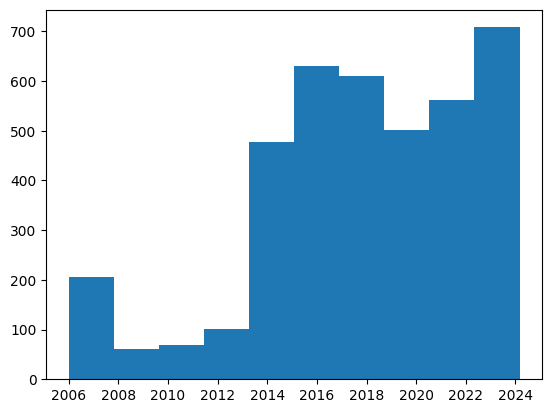

In [39]:
wells_min_date = prod_data.groupby(by=["idpozo"])["fecha"].min()
wells_min_date.hist(grid=False)

<Axes: title={'center': 'Nuevos pozos no convencionales'}, xlabel='Año', ylabel='Cant. nuevos pozos'>

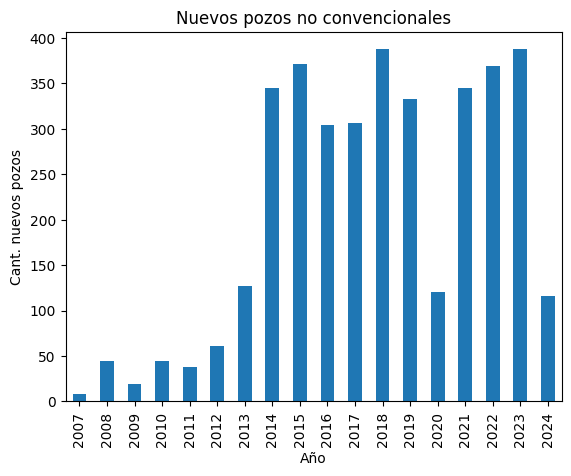

In [42]:
# excluimos 2006 ya que tiene muchas entradas de "arrastre" de años anteriores, no son pozos nuevos.
wells_min_date.apply(lambda x: x.year).value_counts().sort_index()[1:].plot(kind="bar", ylabel="Cant. nuevos pozos", xlabel="Año", title="Nuevos pozos no convencionales")

In [43]:
wells_ids = wells_min_date[wells_min_date < "2014-01-01"].index.to_list()
delete_wells_ids(wells_ids)
prod_data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)

print(f"\nDeleted {len(wells_ids)} wells ids: {wells_ids}\n")

del(wells_min_date)


Deleted 543 wells ids: [3640, 8043, 10073, 11191, 11641, 11642, 11643, 34833, 42900, 42905, 42927, 42933, 42936, 42957, 42961, 42963, 42966, 72016, 72206, 72228, 72232, 72233, 73672, 73804, 75604, 75605, 78337, 79245, 96629, 96630, 96632, 96633, 96634, 96635, 96636, 96639, 96641, 96642, 96643, 96644, 96650, 96651, 96653, 96656, 96657, 96659, 96662, 96663, 96664, 96665, 96687, 96688, 96689, 114867, 114880, 114888, 114889, 115664, 115725, 115728, 115733, 115734, 115744, 116022, 116076, 118332, 124664, 124872, 124880, 124885, 126736, 126808, 126809, 126816, 127861, 128055, 128093, 128998, 129050, 129257, 129725, 129763, 129861, 129863, 129895, 130021, 130022, 130023, 130110, 130158, 130159, 130232, 130297, 130300, 130329, 130380, 130465, 130482, 130515, 130517, 130518, 130519, 130886, 130904, 131068, 131288, 131291, 131344, 131345, 131346, 131399, 131429, 131430, 131431, 131600, 131620, 131621, 131624, 131663, 131718, 131719, 131975, 131984, 131985, 132356, 132360, 132361, 132487, 132488

<ipython-input-43-2753745dce8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)


### Peek inicial a 20 pozos aleatorios

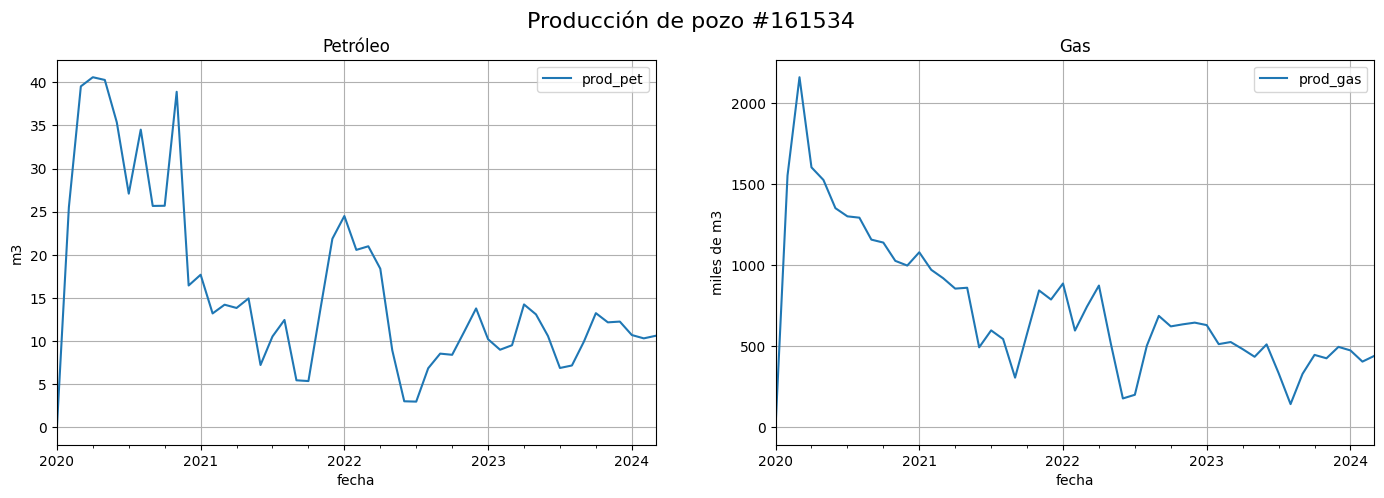

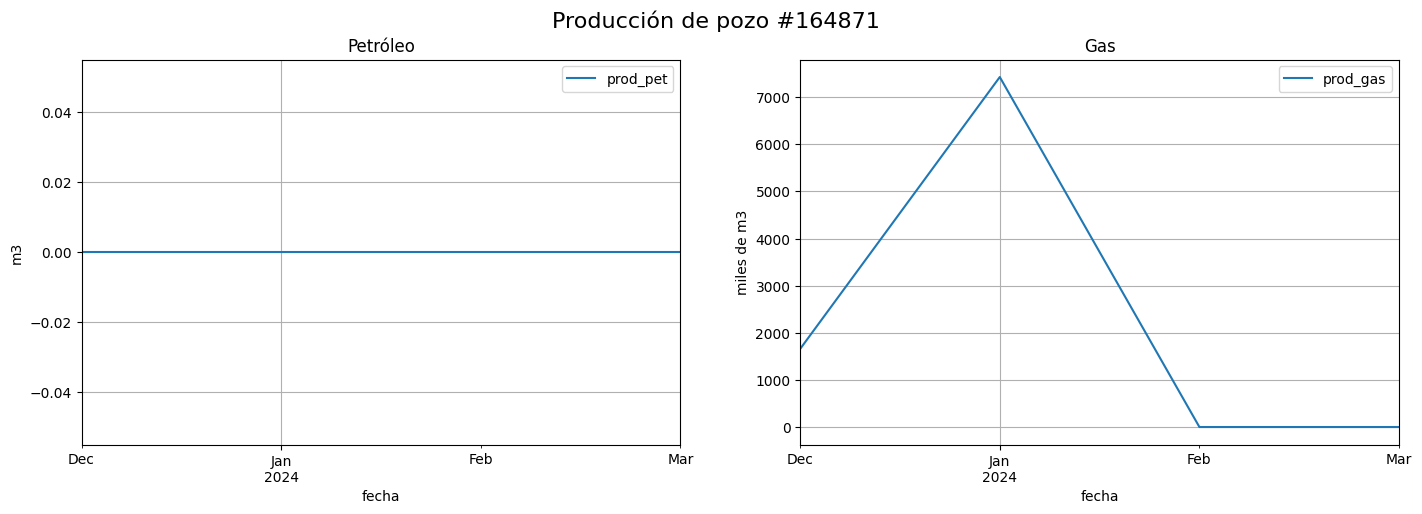

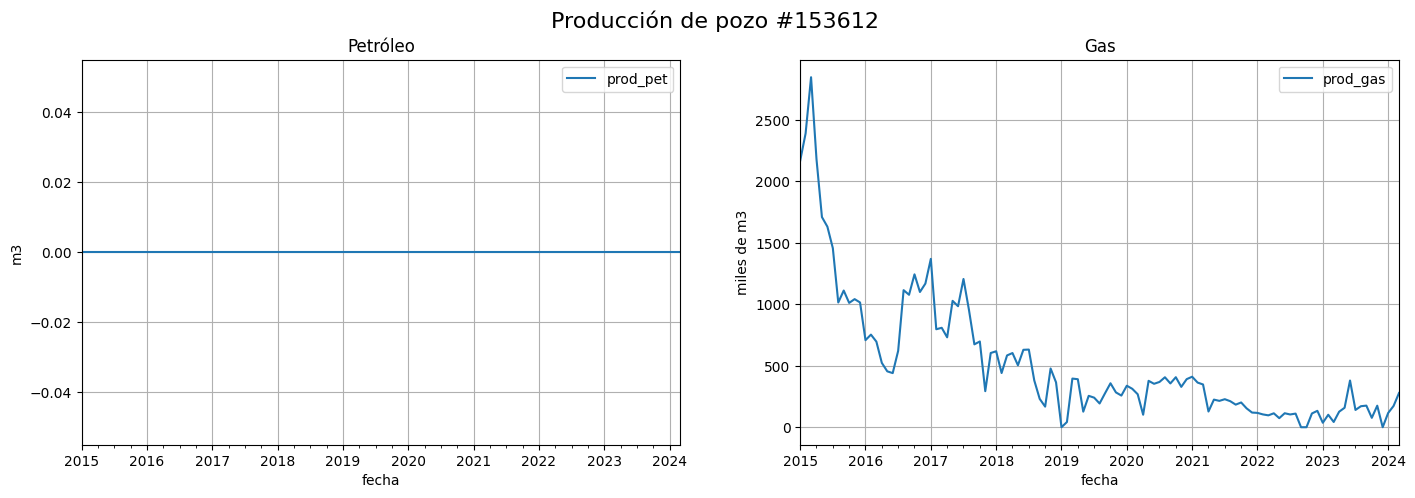

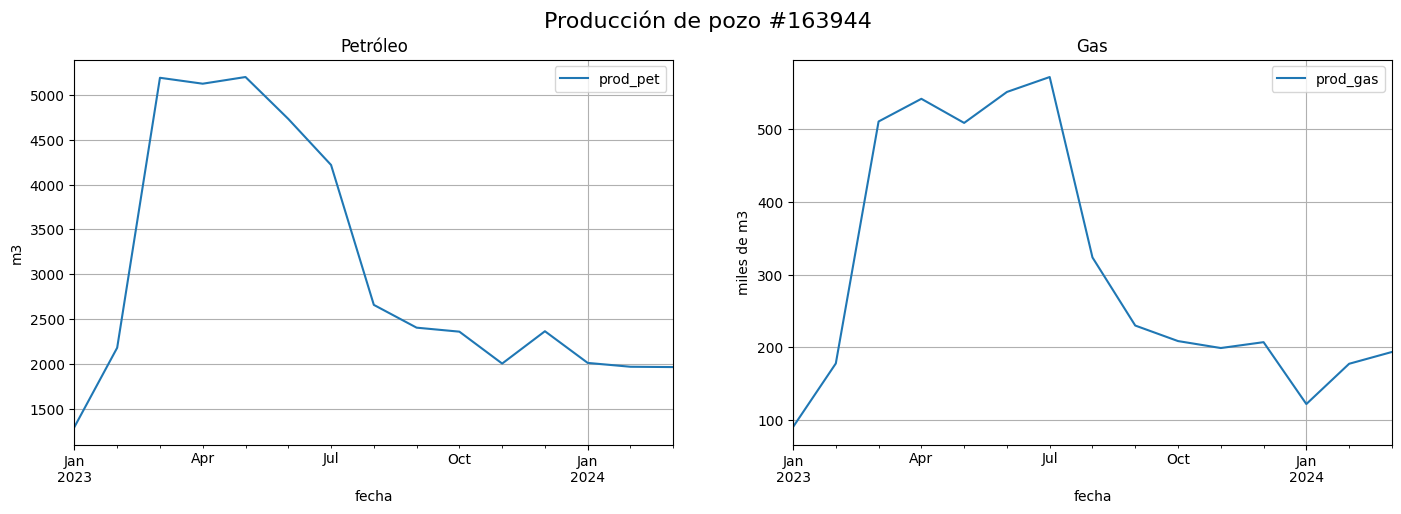

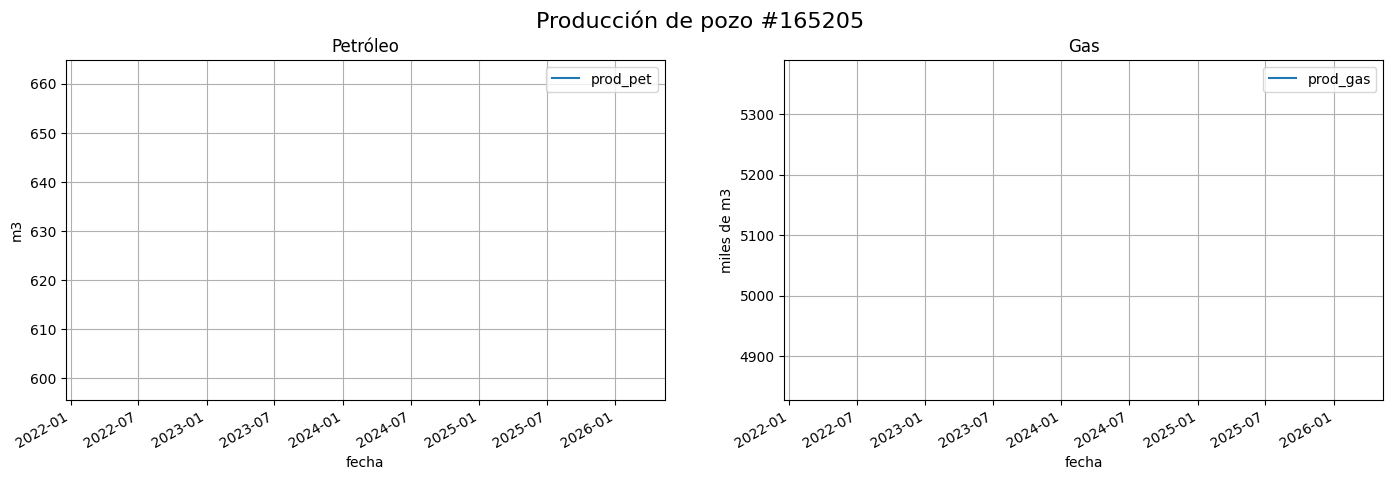

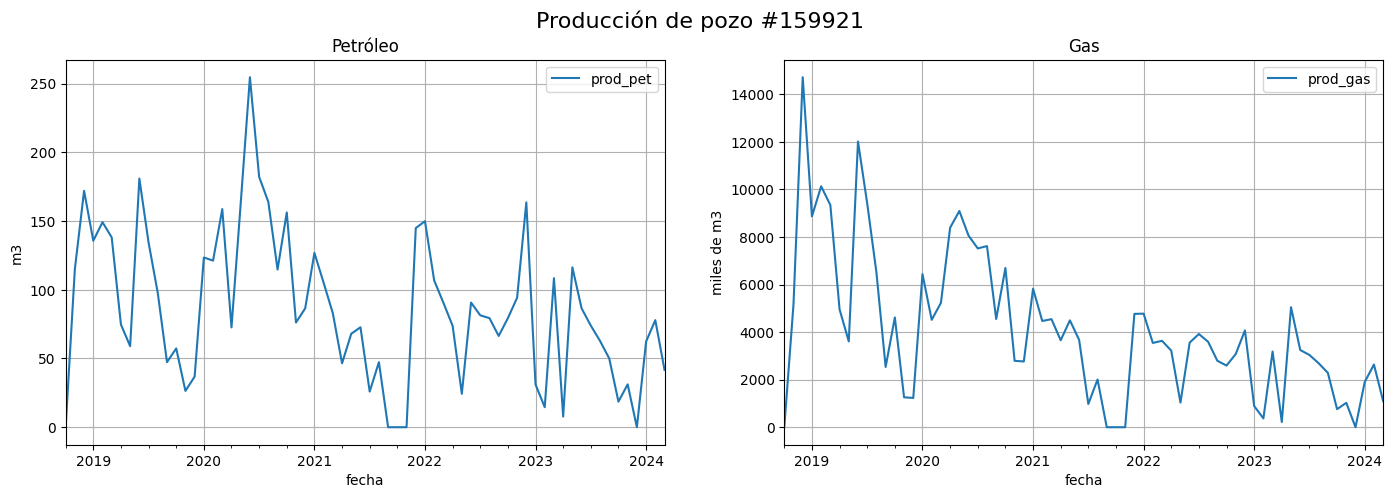

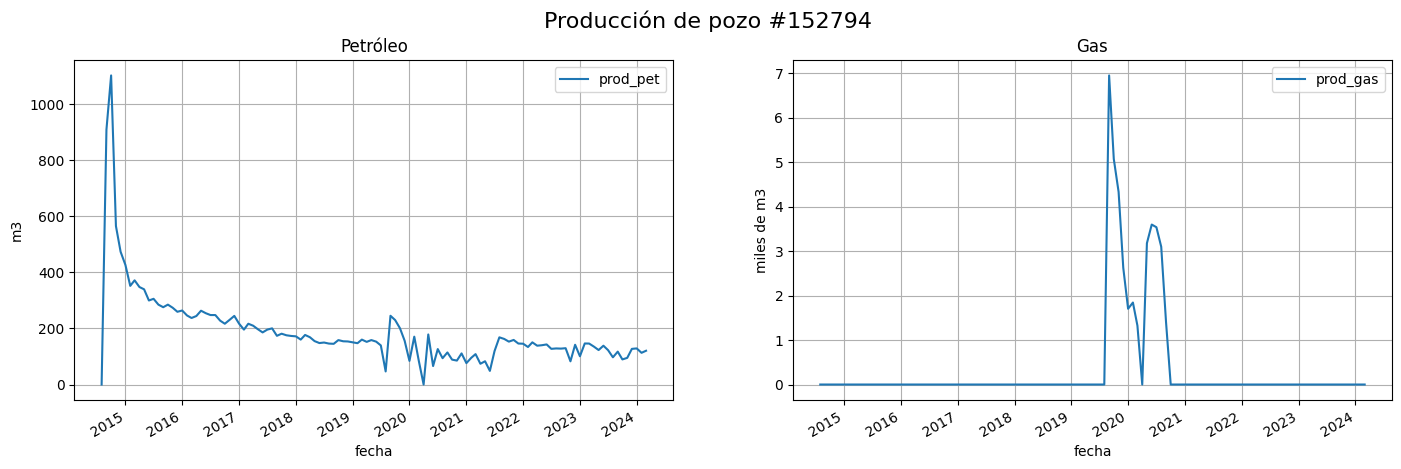

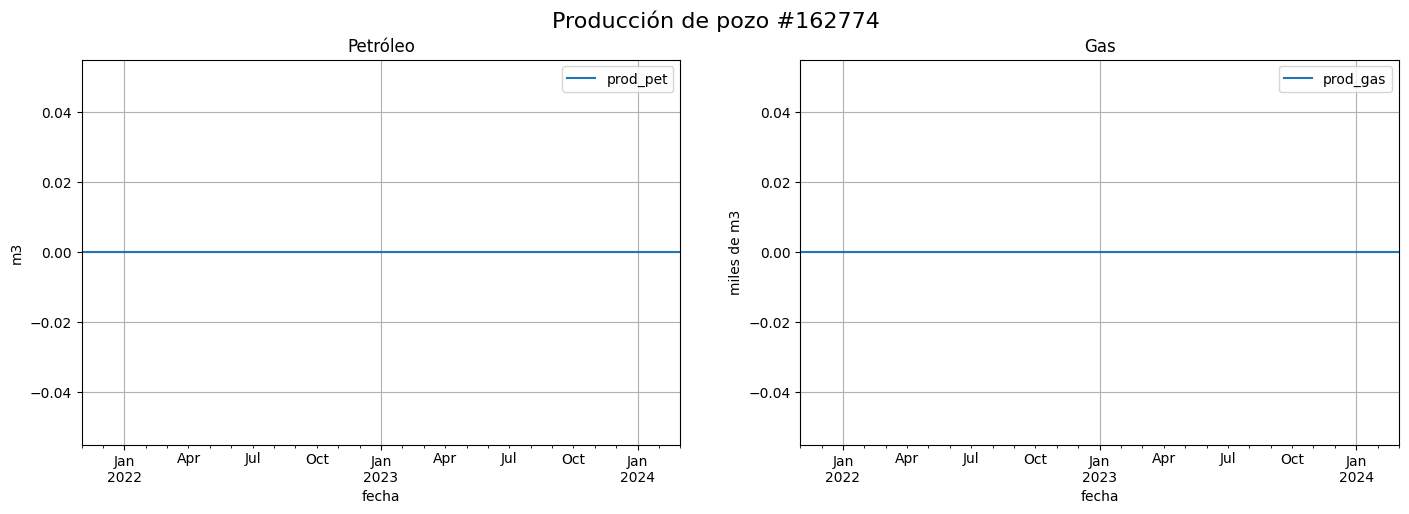

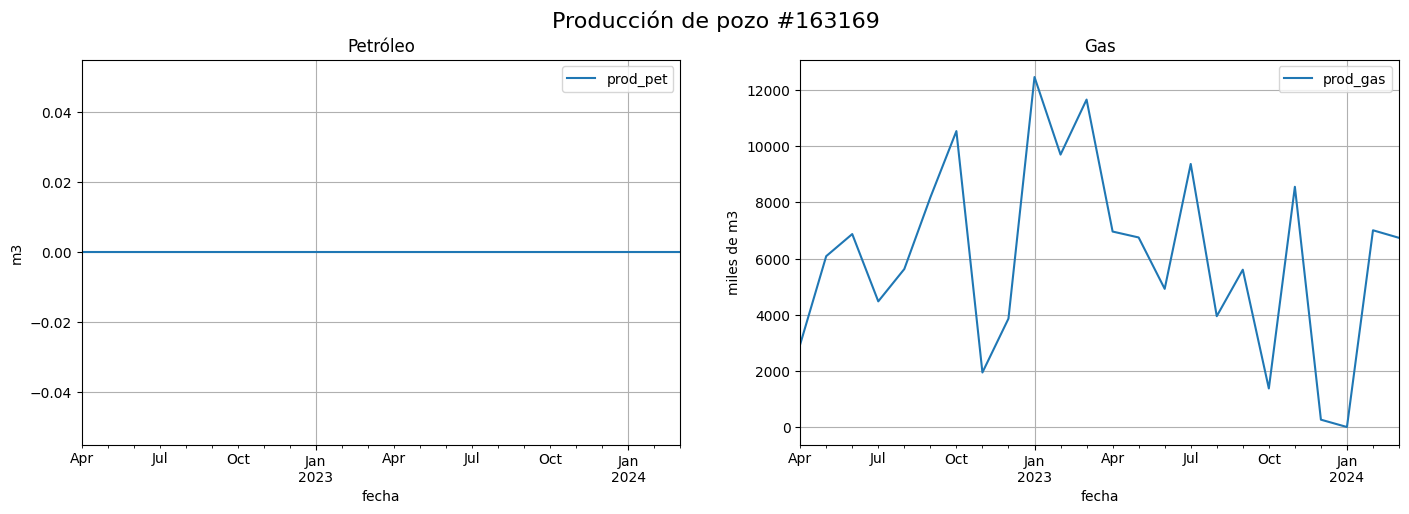

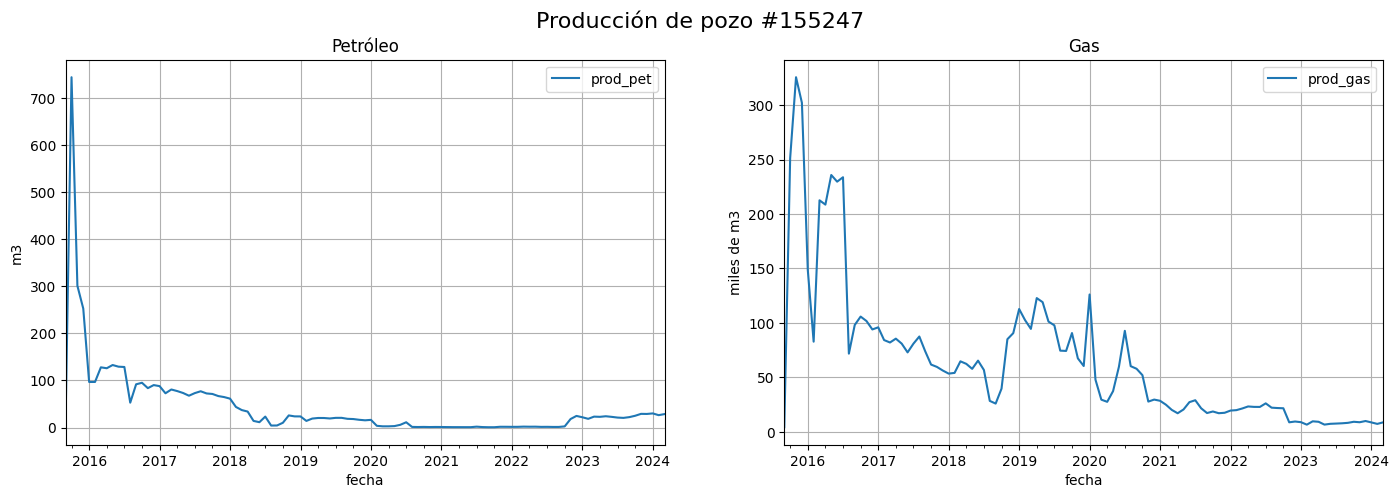

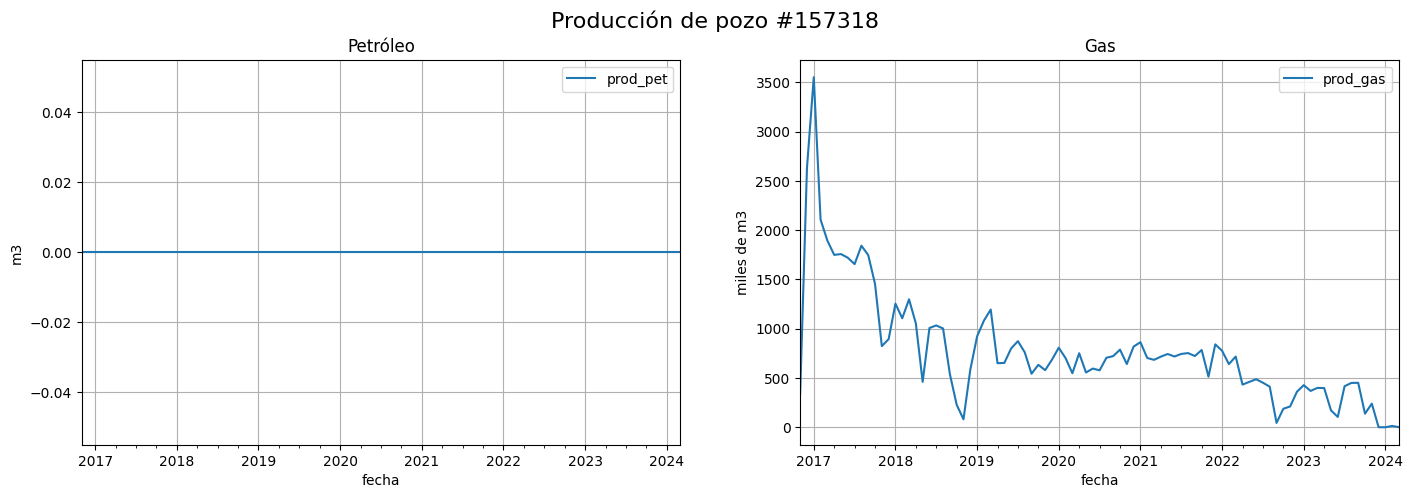

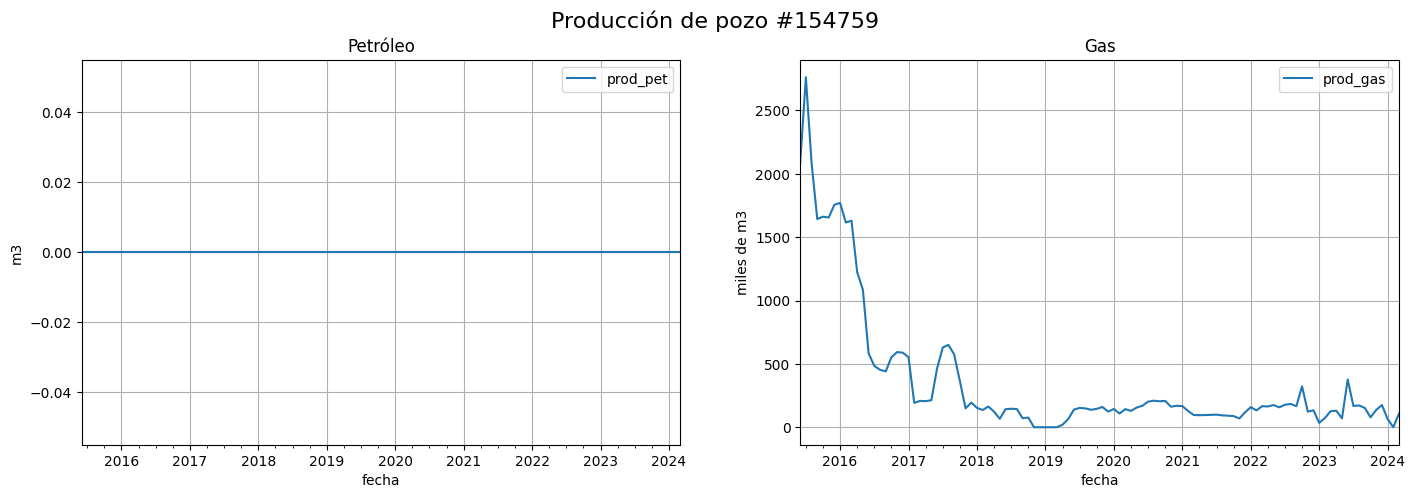

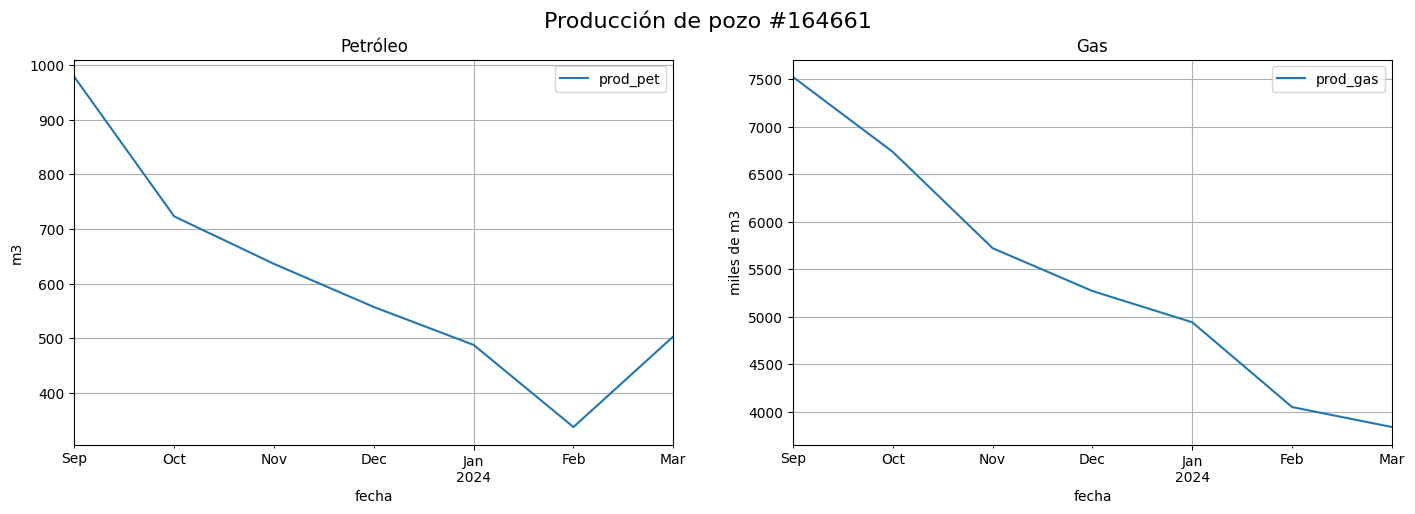

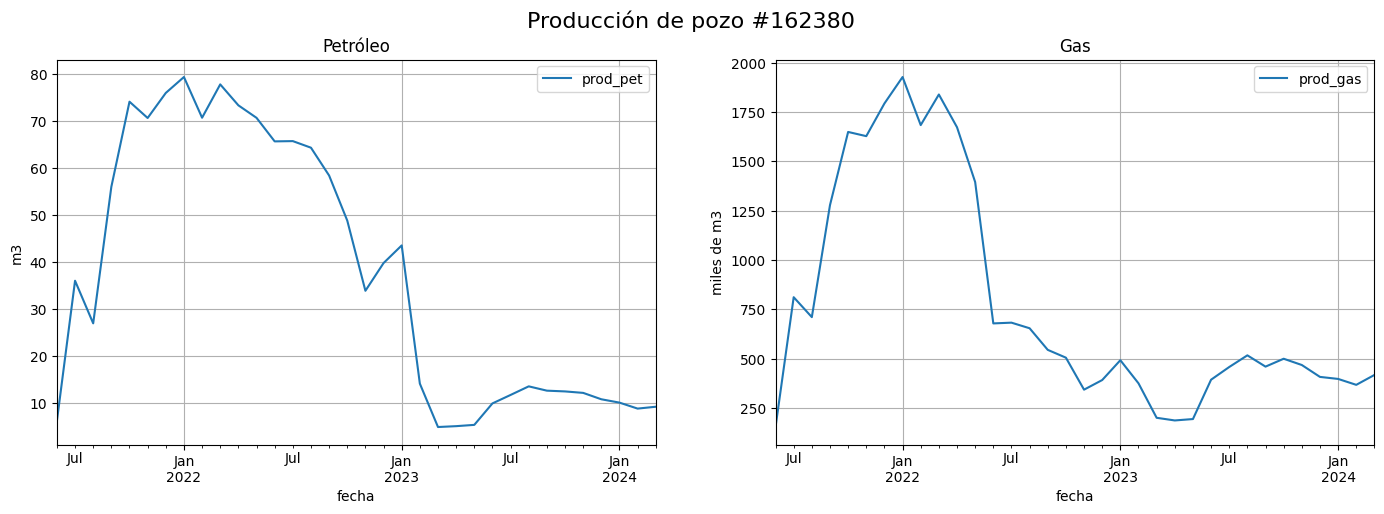

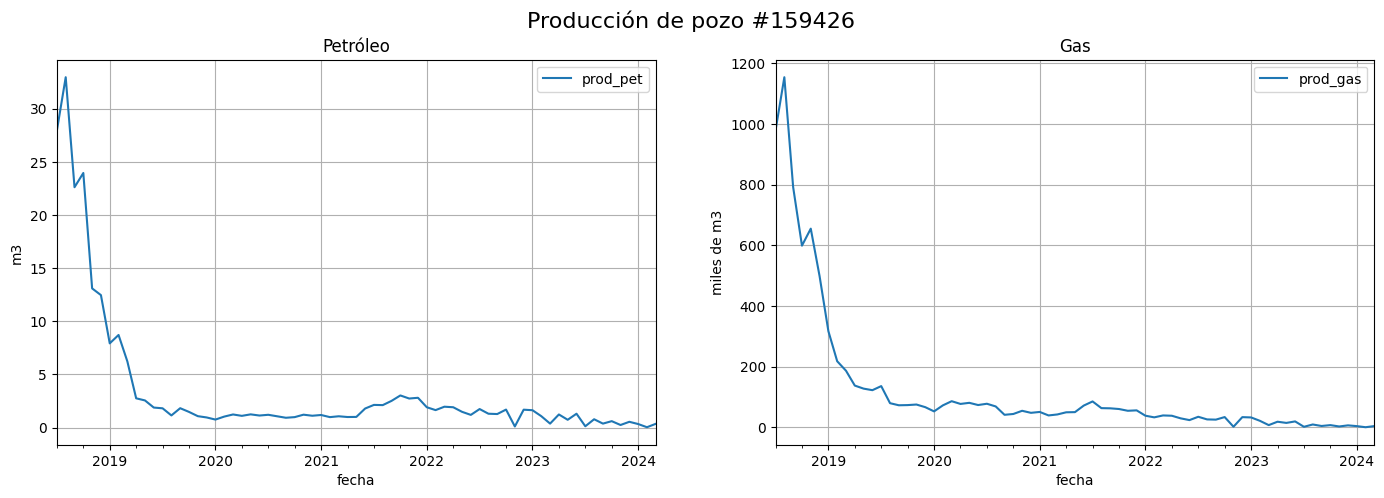

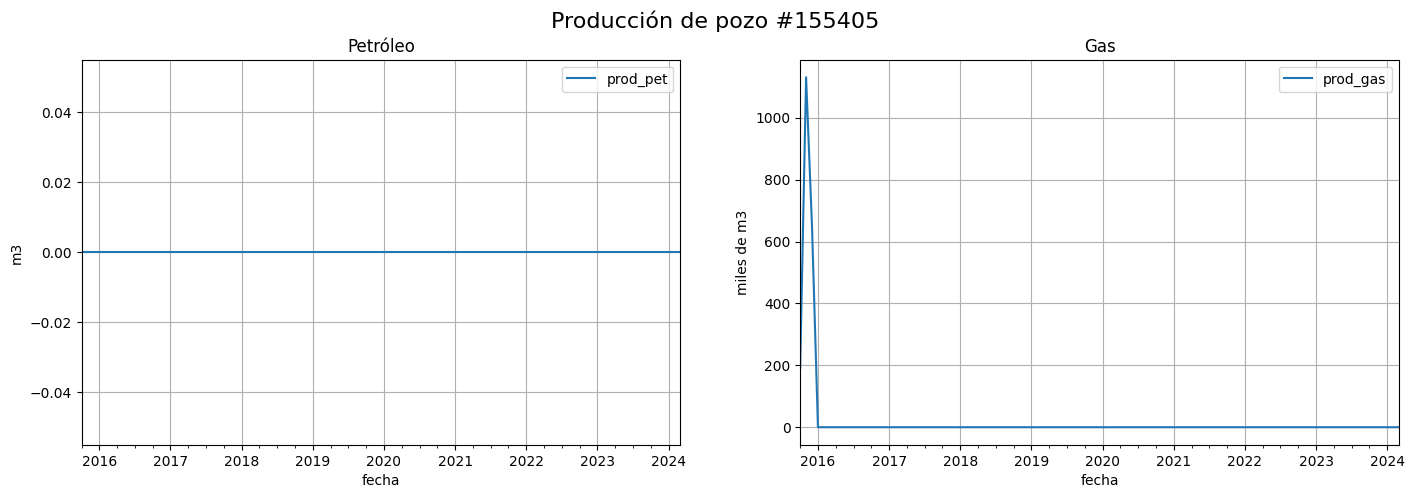

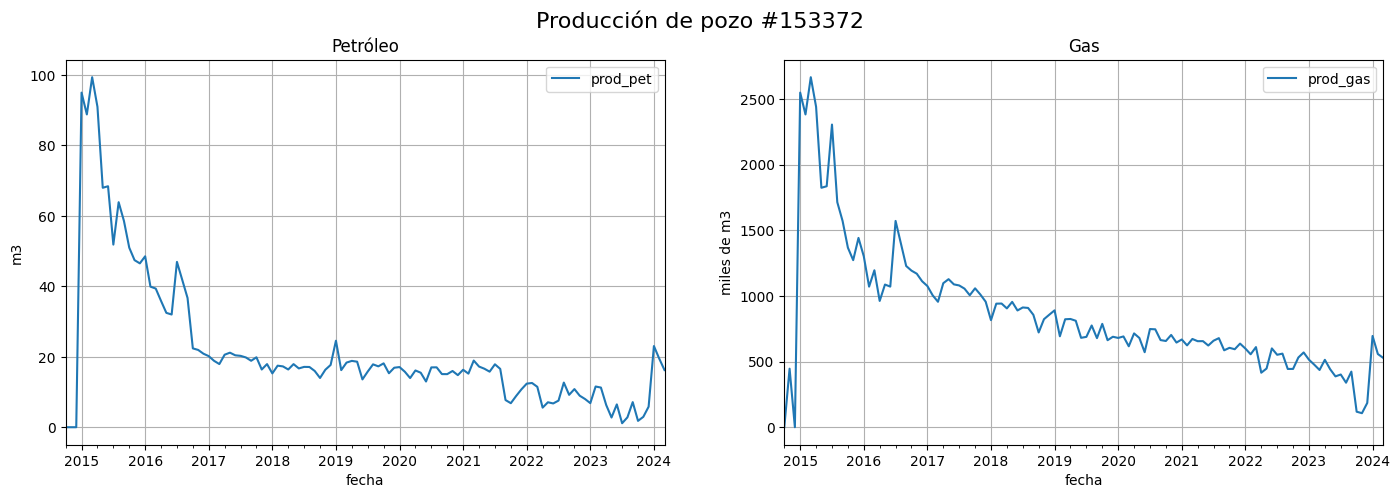

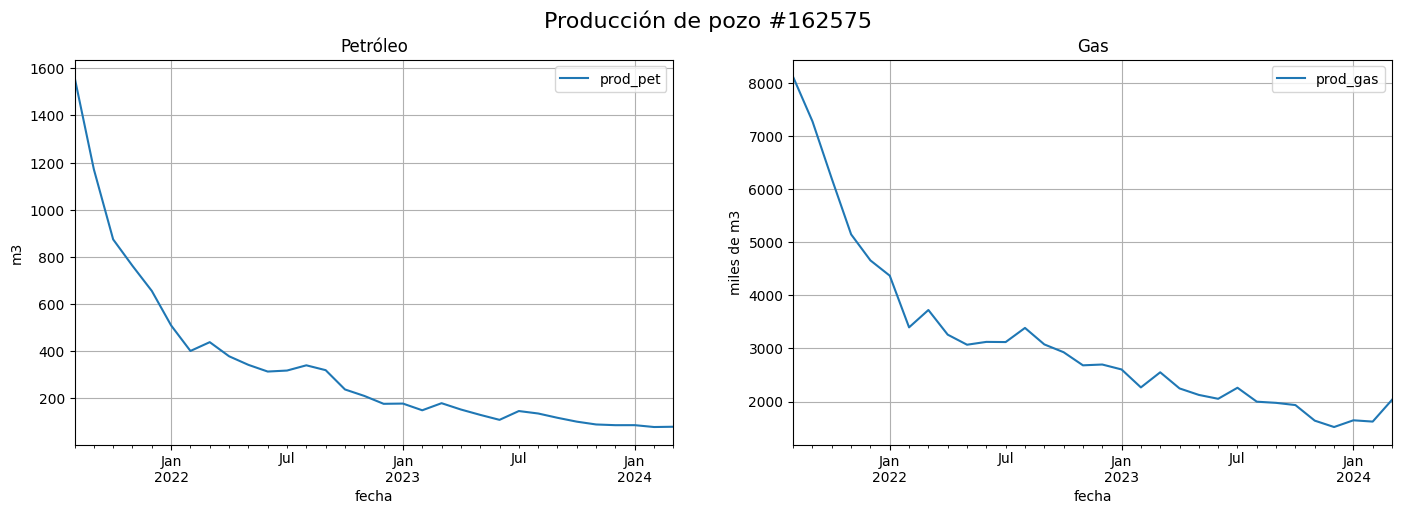

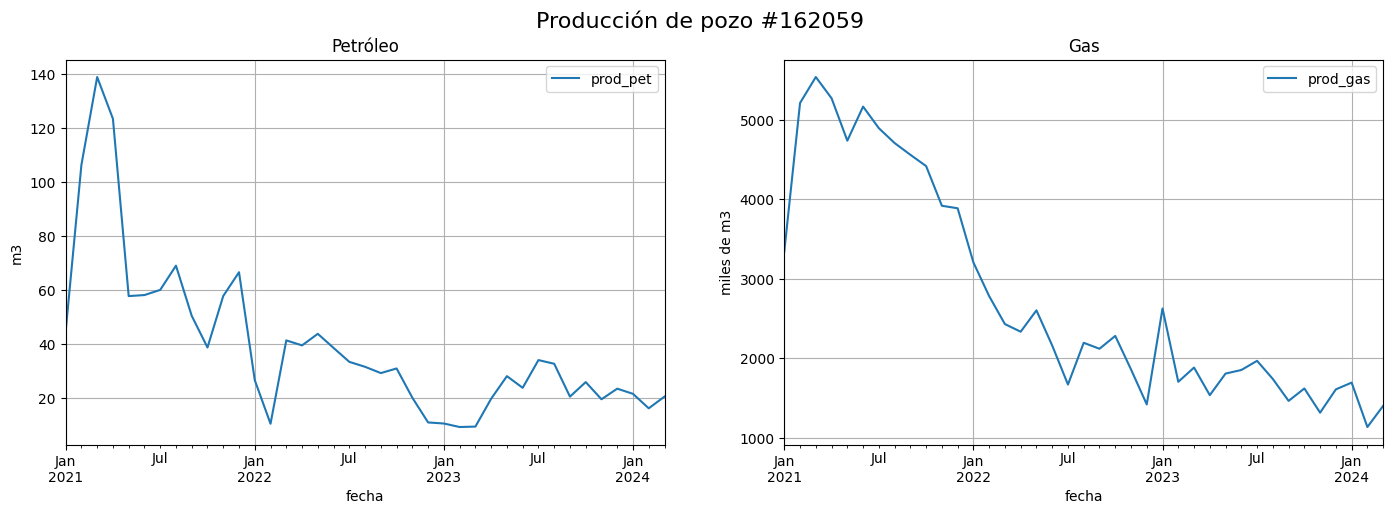

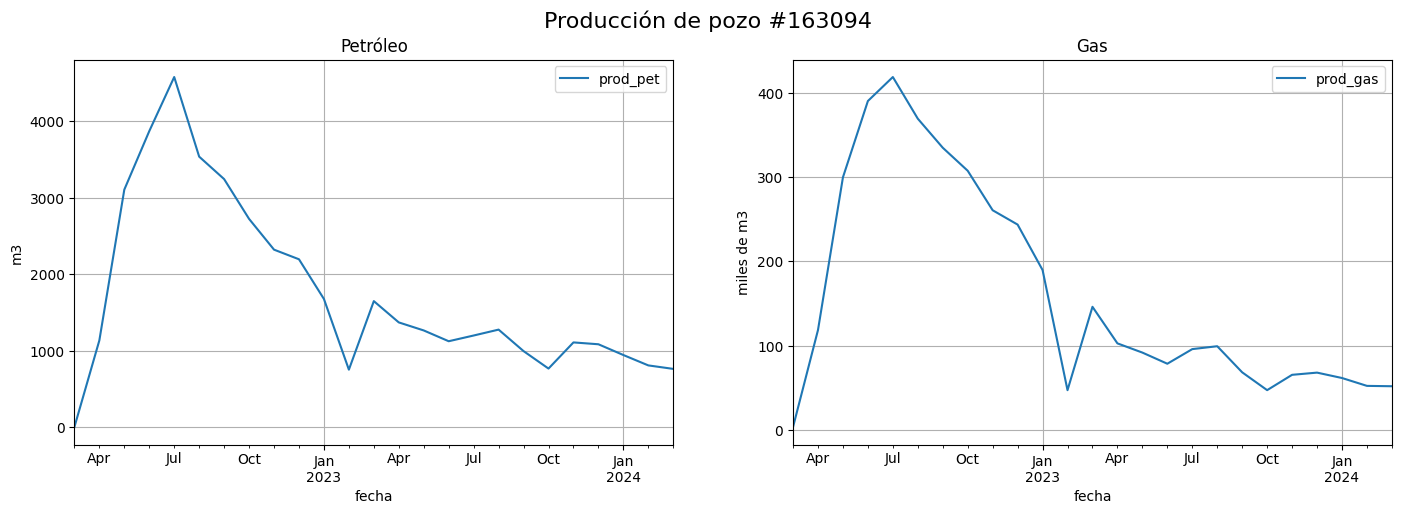

In [44]:
wells_ids_sample = random.sample(prod_data['idpozo'].value_counts().index.to_list(), 20)

for id in wells_ids_sample:
  plot_well_id(id)

# Análisis de pozos anómalos

### Analizamos qué pasa con los pozos con pocas entradas
Muchos tienen menos de MIN_MONTHLY_ENTRIES_COUNT meses de entradas. Los descartamos, considerando dicho umbral temporal como mínimo para la inclusión del pozo en el estudio.

Esto se justifica en que es el mínimo necesario por algunos algoritmos/modelos utilizados posteriormente para el entrenamiento y/o predicción de la producción.

In [45]:
MIN_MONTHLY_ENTRIES_COUNT = 9

def remove_wells_by_min_entries_count(min_entries_count):
  print(f"Filtering wells with less than {min_entries_count} entries...\n")

  result = prod_data.groupby(["idpozo"]).count()
  result = result[result["fecha"] < min_entries_count]
  wells_ids = result.index.to_list()
  delete_wells_ids(wells_ids)

  print(f"\nDeleted {len(wells_ids)} wells ids: {wells_ids}\n")

In [46]:
# Eliminamos pozos con cantidad total de entradas menor a MIN_MONTHLY_ENTRIES_COUNT meses
remove_wells_by_min_entries_count(min_entries_count=MIN_MONTHLY_ENTRIES_COUNT)

Filtering wells with less than 9 entries...


Deleted 309 wells ids: [164503, 164504, 164526, 164527, 164528, 164529, 164530, 164531, 164532, 164550, 164551, 164552, 164553, 164554, 164560, 164563, 164564, 164565, 164566, 164567, 164568, 164569, 164570, 164571, 164572, 164573, 164574, 164575, 164576, 164577, 164578, 164579, 164585, 164588, 164594, 164597, 164604, 164606, 164618, 164619, 164620, 164621, 164622, 164623, 164624, 164625, 164628, 164629, 164636, 164644, 164645, 164646, 164647, 164648, 164649, 164650, 164651, 164652, 164653, 164654, 164655, 164656, 164657, 164658, 164659, 164660, 164661, 164662, 164676, 164677, 164678, 164679, 164680, 164681, 164682, 164683, 164697, 164701, 164705, 164706, 164707, 164708, 164711, 164712, 164713, 164717, 164723, 164724, 164725, 164726, 164727, 164728, 164729, 164730, 164731, 164732, 164733, 164743, 164744, 164745, 164746, 164753, 164757, 164764, 164767, 164771, 164772, 164773, 164774, 164776, 164778, 164779, 164780, 164781, 164788, 164789, 16

### Pozos con fecha de abandono
Los descartamos

In [47]:
print(f"Filtering wells with abandoned date...\n")

result = prod_data[prod_data['adjiv_fecha_abandono'].notna()].groupby(["idpozo"])[["prod_pet", "prod_gas"]].sum()
wells_ids = result[(result["prod_pet"] == 0) & (result["prod_gas"] == 0)].index.to_list()
delete_wells_ids(wells_ids)

print(result)
print(f"\nDeleted {len(wells_ids)} wells ids: {wells_ids}\n")

# Eliminamos este campo fecha dado que ya no nos sirve
prod_data.drop(columns=['adjiv_fecha_abandono'], inplace=True)
data.drop(columns=['adjiv_fecha_abandono'], inplace=True)

Filtering wells with abandoned date...

        prod_pet  prod_gas
idpozo                    
157985       0.0       0.0
160206       0.0       0.0
160576       0.0       0.0
161871       0.0       0.0
162675       0.0       0.0
163194       0.0       0.0
163745       0.0       0.0
164055       0.0       0.0

Deleted 8 wells ids: [157985, 160206, 160576, 161871, 162675, 163194, 163745, 164055]



<ipython-input-47-083e984e506c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data.drop(columns=['adjiv_fecha_abandono'], inplace=True)


### Analizamos qué sucede con los pozos con todas sus entradas de producción cero (o ~cero)
Muchos pozos tienen ambas producciones nulas a lo largo de toda su vida. Los descartamos.

In [48]:
MIN_VALID_TOTAL_PROD = 250

def filter_wells_with_zero_total_production(match_well_type=False):
  print(f"Filtering wells with all production entries zero or ~zero...\n")

  wells_ids = []

  if match_well_type:
    well_prod = prod_data[prod_data["tipopozo"] == "Petrolífero"]
    result = well_prod.groupby(["idpozo"])[["prod_pet"]].max()
    result = result[result["prod_pet"] < MIN_VALID_TOTAL_PROD]
    wells_ids.extend(result.index.to_list())
    print(result)
    print("")

    well_prod = prod_data[prod_data["tipopozo"] == "Gasífero"]
    result = well_prod.groupby(["idpozo"])[["prod_gas"]].max()
    result = result[result["prod_gas"] < MIN_VALID_TOTAL_PROD]
    wells_ids.extend(result.index.to_list())
    print(result)
  else:
    result = prod_data.groupby(["idpozo"])[["prod_pet", "prod_gas"]].max()
    result = result[(result["prod_pet"] < MIN_VALID_TOTAL_PROD) & (result["prod_gas"] < MIN_VALID_TOTAL_PROD)]
    wells_ids.extend(result.index.to_list())
    print(result)

  delete_wells_ids(wells_ids)

  print(f"\nDeleted {len(wells_ids)} wells ids: {wells_ids}\n")

In [49]:
filter_wells_with_zero_total_production(match_well_type=False)

Filtering wells with all production entries zero or ~zero...

        prod_pet  prod_gas
idpozo                    
146207     59.02     0.000
146275     90.00    39.924
146927      0.00     0.000
146983    239.99   220.730
147318    145.97    83.090
...          ...       ...
164350      0.00     0.000
164351      0.00     0.000
164352      0.00     0.000
164455      0.00     0.000
164456      0.00     0.000

[237 rows x 2 columns]

Deleted 237 wells ids: [146207, 146275, 146927, 146983, 147318, 147538, 147635, 152864, 153218, 153389, 153463, 153464, 153465, 153608, 153644, 153674, 153768, 153794, 153869, 153890, 153913, 154198, 154476, 154562, 154563, 154564, 154565, 154566, 154567, 154568, 154569, 154576, 154757, 154763, 154939, 155088, 155229, 155249, 155256, 155421, 155537, 155555, 155557, 155640, 155642, 155644, 155717, 155785, 156376, 156380, 156418, 156562, 156599, 156604, 156643, 156804, 156929, 157103, 157104, 157132, 157135, 157451, 157603, 157604, 157606, 157695, 157712, 15

### Se descartan las entradas que contengan cero (o ~cero) de producción por delante y por detras de la serie con entradas productivas (leading & trailing zeros or ~zeros)
Es decir, se busca utilizar sólo la curva de producción como tal. El ruido de entradas en cero en los extremos se descarta.

In [50]:
MIN_VALID_MONTHLY_PROD = 40
MIN_MEAN_PROPORTION = 1/5

def remove_well_id_zeros_ends(id, match_well_type=False, debug=False):
  APPLY_MIN_MONTHLY_PROD = MIN_VALID_MONTHLY_PROD

  well_prod = prod_data[prod_data["idpozo"] == id]

  # If match_well_type is ON we only care for the specific prod_ that matches well's type
  if match_well_type:
    well_type = well_prod["tipopozo"].value_counts().index[0]

    if well_type == "Petrolífero":
      MIN_VALID_PROD_BY_MEAN = well_prod["prod_pet"].mean() * MIN_MEAN_PROPORTION
      APPLY_MIN_MONTHLY_PROD = max([MIN_VALID_MONTHLY_PROD, MIN_VALID_PROD_BY_MEAN])
      valid_entries_mask = (well_prod["prod_pet"] > APPLY_MIN_MONTHLY_PROD)
    elif well_type == "Gasífero":
      MIN_VALID_PROD_BY_MEAN = well_prod["prod_gas"].mean() * MIN_MEAN_PROPORTION
      APPLY_MIN_MONTHLY_PROD = max([MIN_VALID_MONTHLY_PROD, MIN_VALID_PROD_BY_MEAN])
      valid_entries_mask = (well_prod["prod_gas"] > APPLY_MIN_MONTHLY_PROD)
    else:
      return 0

  else:
    valid_entries_mask = (well_prod["prod_pet"] > APPLY_MIN_MONTHLY_PROD) | (well_prod["prod_gas"] > APPLY_MIN_MONTHLY_PROD)

  well_prod_filtered = well_prod[valid_entries_mask].sort_values(by=['fecha'], ascending=True)

  if len(well_prod_filtered) == 0:
    # No valid entries, then we delete the entire well
    remove_index = well_prod.index
    delete_index_ids(remove_index)

    if APPLY_MIN_MONTHLY_PROD != MIN_VALID_MONTHLY_PROD:
      print(f"Deleted completely using {APPLY_MIN_MONTHLY_PROD:.2f} mean min criteria for well {id}")

    return len(remove_index)

  first_entry_date = well_prod_filtered['fecha'].head(1).iloc[0]
  last_entry_date = well_prod_filtered['fecha'].tail(1).iloc[0] + pd.DateOffset(months=1) # we leave last month with zero or ~zero production

  if debug:
    print("First entry date:\n", well_prod_filtered.head(1))
    print("\nLast entry date:\n", well_prod_filtered.tail(1))

  remove_condition_mask = ~(well_prod["fecha"].between(first_entry_date, last_entry_date))
  remove_index = well_prod[remove_condition_mask].index

  if len(remove_index) == 0:
    return 0

  if APPLY_MIN_MONTHLY_PROD != MIN_VALID_MONTHLY_PROD:
    print(f"Using {APPLY_MIN_MONTHLY_PROD:.2f} mean min criteria for well {id}")

  delete_index_ids(remove_index)
  return len(remove_index)

def remove_wells_zeros_ends(match_well_type):
  print("Removing wells zeros ends...\n")

  wells_ids = prod_data['idpozo'].value_counts().index.to_list()

  removed_entries = 0
  affected_wells = 0

  for id in wells_ids:
    res = remove_well_id_zeros_ends(id, match_well_type=match_well_type)
    removed_entries += res
    affected_wells += 1 if res > 0 else 0

  print(f"Total removed entries: {removed_entries}")
  print(f"Total affected wells: {affected_wells}\n")

#### Ejemplos del procesamiento




First entry date:
        idpozo      fecha  prod_pet  prod_gas  tipopozo
24708  146980 2014-04-01       0.0    954.28  Gasífero

Last entry date:
         idpozo      fecha  prod_pet  prod_gas  tipopozo
100587  146980 2018-10-01       0.0    831.44  Gasífero
Using 175.56 mean min criteria for well 146980

Removed entries: 67




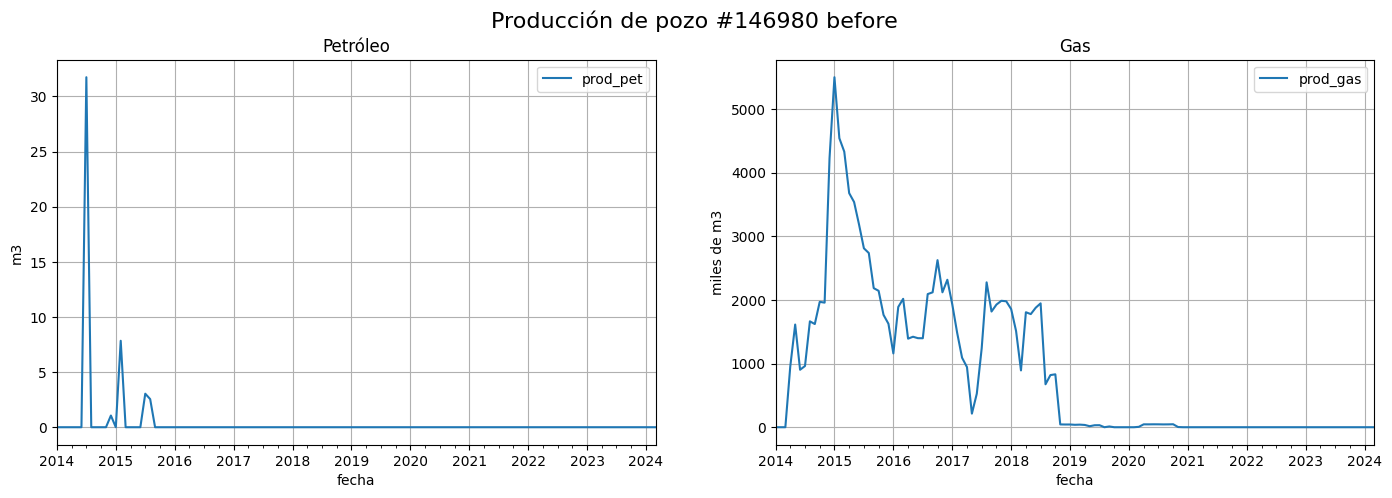

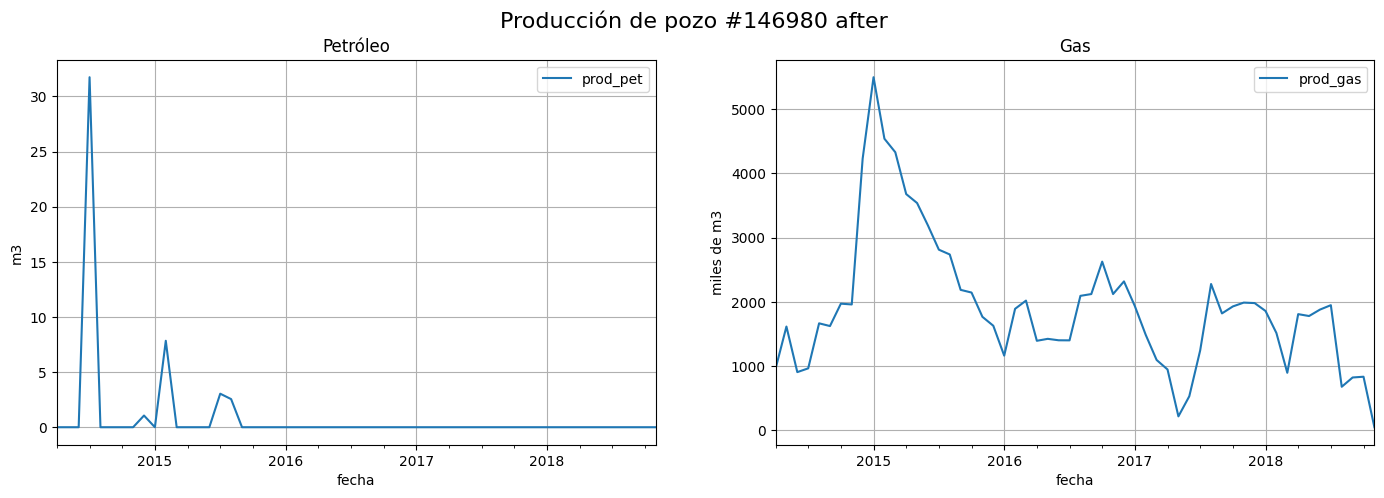

In [51]:
EXAMPLE_ID = 146980
print("")
plot_well_id(EXAMPLE_ID, desc="before")
print(f"\nRemoved entries: {remove_well_id_zeros_ends(EXAMPLE_ID, debug=True, match_well_type=True)}\n")
print("")
plot_well_id(EXAMPLE_ID, desc="after")


First entry date:
        idpozo      fecha  prod_pet  prod_gas     tipopozo
27662  152848 2014-08-01   1216.14     76.95  Petrolífero

Last entry date:
         idpozo      fecha  prod_pet  prod_gas     tipopozo
202497  152848 2022-01-01     54.37       6.8  Petrolífero

Removed entries: 30




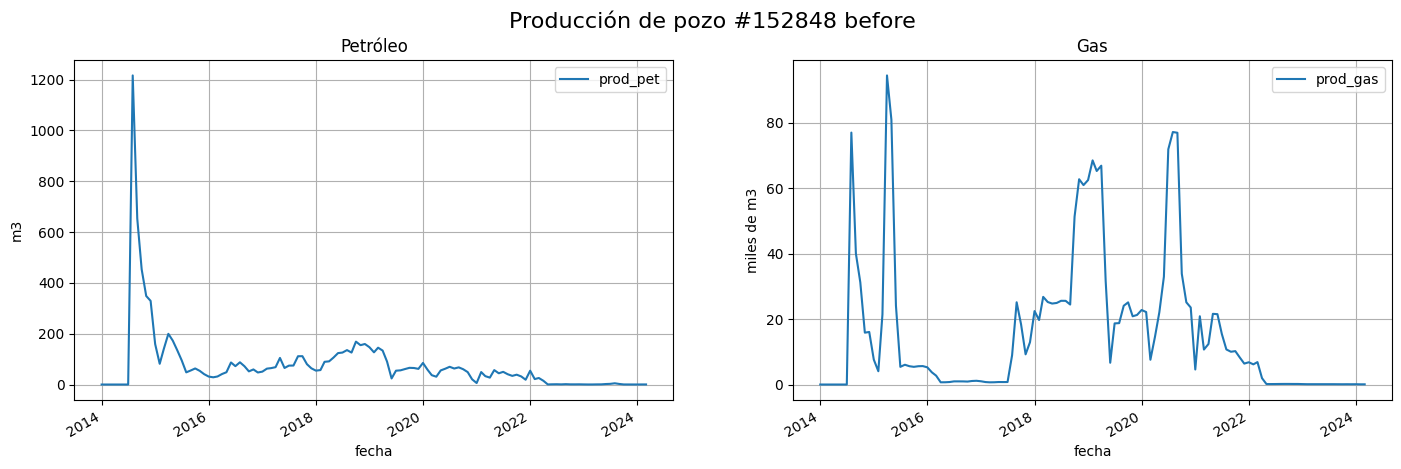

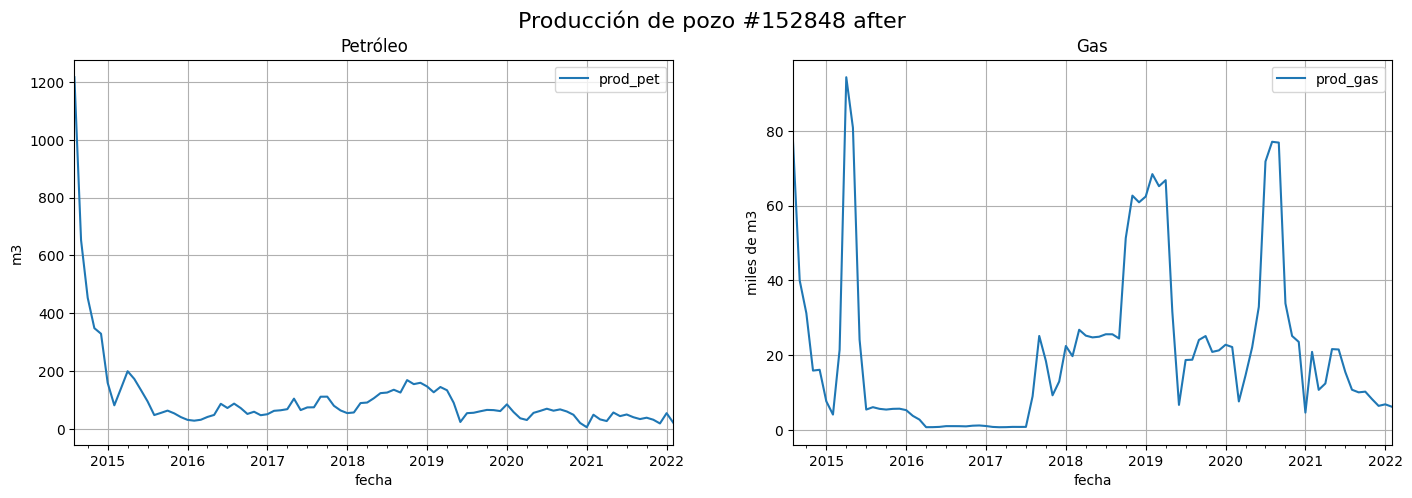

In [52]:
EXAMPLE_ID = 152848
print("")
plot_well_id(EXAMPLE_ID, desc="before")
print(f"\nRemoved entries: {remove_well_id_zeros_ends(EXAMPLE_ID, debug=True, match_well_type=True)}\n")
print("")
plot_well_id(EXAMPLE_ID, desc="after")


First entry date:
         idpozo      fecha  prod_pet  prod_gas  tipopozo
118131  160524 2019-05-01       0.0   3062.33  Gasífero

Last entry date:
         idpozo      fecha  prod_pet  prod_gas  tipopozo
201110  160524 2021-12-01    147.08   1613.91  Gasífero
Using 415.20 mean min criteria for well 160524

Removed entries: 26




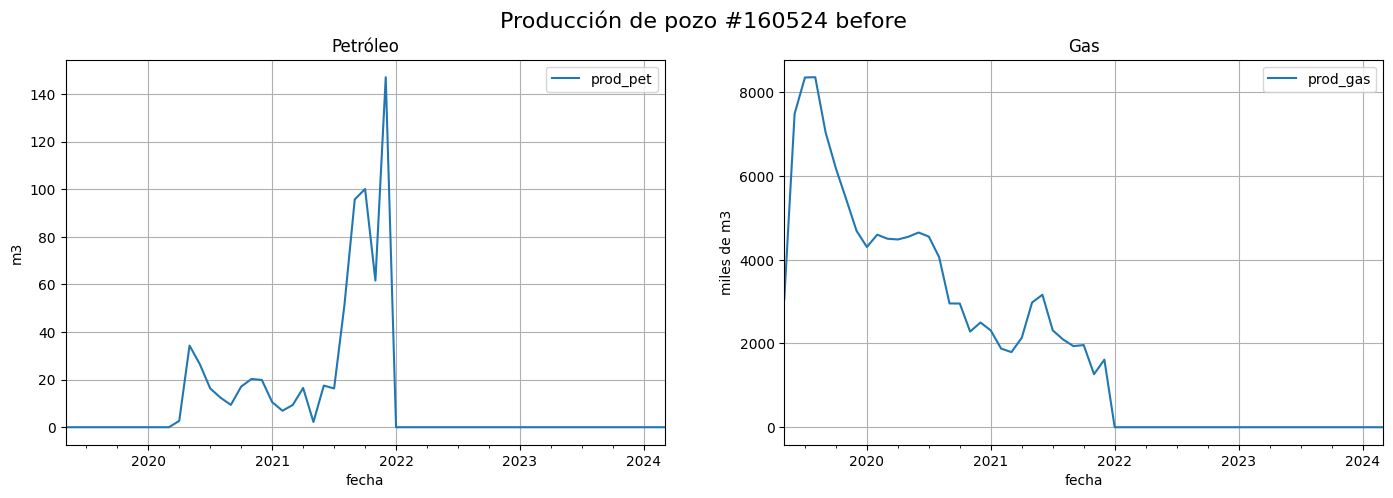

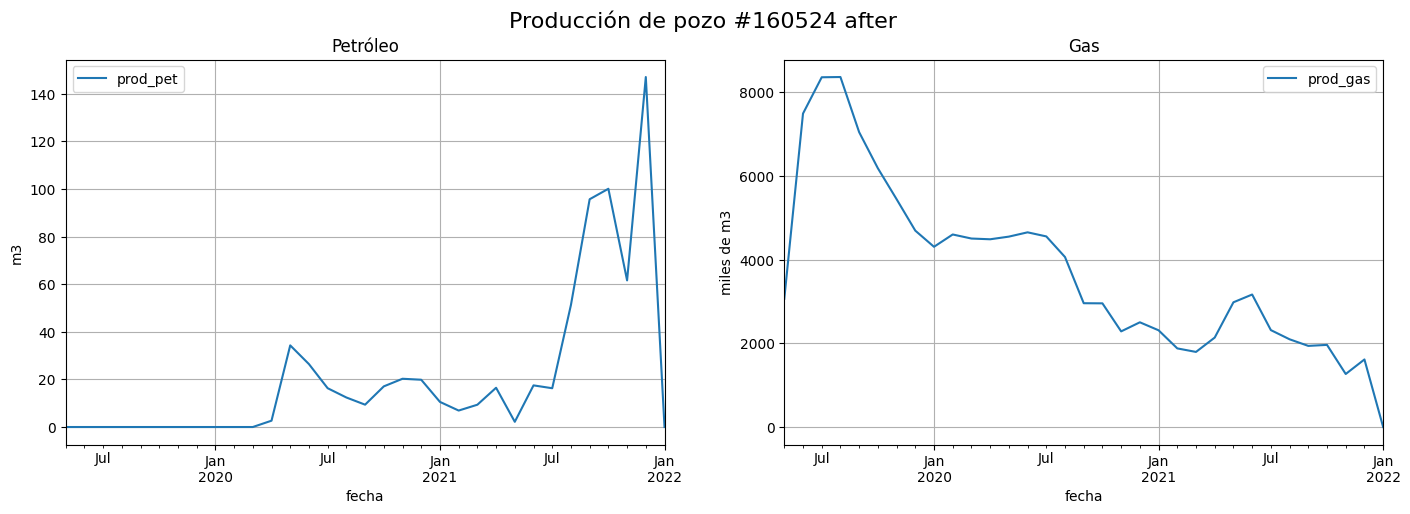

In [53]:
EXAMPLE_ID = 160524
print("")
plot_well_id(EXAMPLE_ID, desc="before")
print(f"\nRemoved entries: {remove_well_id_zeros_ends(EXAMPLE_ID, debug=True, match_well_type=True)}\n")
print("")
plot_well_id(EXAMPLE_ID, desc="after")

#### Procesamos todos los pozos

In [57]:
%%time
remove_wells_zeros_ends(match_well_type=False)

Removing wells zeros ends...

Total removed entries: 21836
Total affected wells: 1415

CPU times: user 31.3 s, sys: 19.7 ms, total: 31.3 s
Wall time: 32 s


### Analizamos qué sucede con los pozos que varían su "tipopozo" durante su ciclo de vida
Son pozos cuyo campo "tipopozo" varía de valor en distintas entradas de producción.

Se evalúan y se unifica según criterio a un único valor tipo de pozo.

In [58]:
print(prod_data["tipopozo"].value_counts())
print("")
# We set anything different than Pet/Gas types as "Otro tipo"
prod_data.loc[~prod_data["tipopozo"].isin(["Gasífero", "Petrolífero"]), "tipopozo"] = "Otro tipo"
print(prod_data["tipopozo"].value_counts())

tipopozo
Gasífero            101791
Petrolífero          65452
Otro tipo              633
Inyección de Gas         5
Name: count, dtype: int64

tipopozo
Gasífero       101791
Petrolífero     65452
Otro tipo         638
Name: count, dtype: int64


In [73]:
# Arbitrary function to determine which type suits better to each well
def calculate_well_type(id):
  well_prod = prod_data[prod_data["idpozo"] == id]
  well_types_count = well_prod["tipopozo"].value_counts()
  well_types = well_types_count.index.to_list()

  # If "Otro tipo" is included, we discard it and continue the decision process based on the other 1 or 2 types.
  if "Otro tipo" in well_types:
    well_types.remove("Otro tipo")

    # If only one remains, we set it as the well main type.
    if len(well_types) == 1:
      return well_types[0]

  # Case remaining: 2 types included (Petrolífero and Gasífero)
  prod_pet = well_prod["prod_pet"].sum()
  prod_gas = well_prod["prod_gas"].sum()

  # Those with prod_pet beeing more than 2 times prod_gas (or the other way around) are tagged as tipo pozo Petrolífero (or Gasífero).
  if prod_pet > 2 * prod_gas:
    return "Petrolífero"
  elif prod_gas > 2 * prod_pet:
    return "Gasífero"

  # If we still cant decide, we set well's type with a softer condition
  if well_types_count["Petrolífero"] >= well_types_count["Gasífero"]:
    return "Petrolífero"
  else:
    return "Gasífero"

  return None

In [60]:
# Group by idpozo and tipopozo into a multindex series.
# Then we group again by idpozo and filter the ones with more than one entry per idpozo. This means more than one tipopozo.

print("Searching for wells with multiple types...\n")
wells_ids_with_multiple_types = prod_data.groupby(["idpozo"])[["idpozo", "tipopozo"]] \
                                         .value_counts().groupby(level=0).filter(lambda x: len(x) >= 2).index
wells_ids = wells_ids_with_multiple_types.unique(level="idpozo").to_list()

print(wells_ids_with_multiple_types)
print(f"\nFound {len(wells_ids)} wells with more than one type\n")

del(wells_ids_with_multiple_types)

print("Fixing wells types...\n")

affected_wells = []
not_affected_wells = []

for id in wells_ids:
  well_type_to_set = calculate_well_type(id)

  if well_type_to_set == None:
    not_affected_wells.append(id)
  else:
    affected_wells.append(id)
    prod_data.loc[prod_data["idpozo"] == id, "tipopozo"] = well_type_to_set

print(f"Affected wells ({len(affected_wells)}): {affected_wells}")
print(f"Unaffected wells ({len(not_affected_wells)}): {not_affected_wells}\n")

Searching for wells with multiple types...

MultiIndex([(146220,    'Gasífero'),
            (146220,   'Otro tipo'),
            (146221, 'Petrolífero'),
            (146221,   'Otro tipo'),
            (146278, 'Petrolífero'),
            (146278,    'Gasífero'),
            (146278,   'Otro tipo'),
            (146778,    'Gasífero'),
            (146778,   'Otro tipo'),
            (146877,    'Gasífero'),
            ...
            (160931,    'Gasífero'),
            (160931,   'Otro tipo'),
            (161375,    'Gasífero'),
            (161375,   'Otro tipo'),
            (161377,    'Gasífero'),
            (161377,   'Otro tipo'),
            (163762,   'Otro tipo'),
            (163762, 'Petrolífero'),
            (164374, 'Petrolífero'),
            (164374,    'Gasífero')],
           names=['idpozo', 'tipopozo'], length=209)

Found 102 wells with more than one type

Fixing wells types...

Affected wells (102): [146220, 146221, 146278, 146778, 146877, 147047, 147167, 14

In [61]:
# Debugging code to manually observe and evaluate non affected wells

#for id in not_affected_wells:
#  total_prods = get_prod_by_well_id(id)[["prod_pet", "prod_gas"]].sum()
#  well_types_count = get_prod_by_well_id(id)[["tipopozo"]].value_counts()
#  other_type_count = well_types_count["Otro tipo"] if "Otro tipo" in well_types_count.index.to_list() else 0
#  desc = f"P{well_types_count['Petrolífero']} - G{well_types_count['Gasífero']} - O{other_type_count}- PP{total_prods['prod_pet']:.2f} - PG{total_prods['prod_gas']:.2f}"
#  plot_well_id(id, desc)

### Analizamos qué sucede con los pozos cuya producción máxima coincide con la suma total
Esto es indicativo de que dichos pozos tienen una única entrada mensual, y el resto de las entradas son cero. O son pozos con una única entrada.

Se descartan.

In [62]:
# Ambas producciones (gas y petróleo) tienen máximo y total iguales.
print("Filtering wells with same max() and sum()...\n")

result = prod_data.groupby(["idpozo"])
result = result[["prod_pet", "prod_gas"]].sum() == result[["prod_pet", "prod_gas"]].max()
result = result[(result["prod_pet"] == True) & (result["prod_gas"] == True)]
wells_ids = result.index.to_list()
delete_wells_ids(wells_ids)

print(result)
print(f"\nDeleted wells ids: {wells_ids}\n")

del(result)

Filtering wells with same max() and sum()...

        prod_pet  prod_gas
idpozo                    
147643      True      True
152862      True      True
153337      True      True

Deleted wells ids: [147643, 152862, 153337]



In [65]:
# Para pozos de tipo Gasífero, se toma sólo la producción principal (gas) y se observa si tiene máximo y total iguales.
# En este caso ignoramos, si hubiese, los datos de producción de petróleo, ya que no nos interesa dado que nuestro foco es el gas.
print("Filtering gas wells with same max() and sum()...\n")

gas_wells_grouped = prod_data[prod_data['tipopozo'] == 'Gasífero'][["idpozo", "prod_gas"]].groupby(["idpozo"])
result = gas_wells_grouped[["prod_gas"]].sum() == gas_wells_grouped[["prod_gas"]].max()
result = result[result["prod_gas"] == True]
wells_ids = result.index.to_list()
delete_wells_ids(wells_ids)

print(result)
print(f"\nDeleted wells ids: {wells_ids}\n")

del(gas_wells_grouped)

Filtering gas wells with same max() and sum()...

Empty DataFrame
Columns: [prod_gas]
Index: []

Deleted wells ids: []



In [66]:
# Para pozos de tipo Petrolífero, se toma sólo la producción principal (petróleo) y se observa si tiene máximo y total iguales.
# En este caso ignoramos, si hubiese, los datos de producción de gas, ya que no nos interesa dado que nuestro foco es el petróleo.
print("Filtering pet wells with same max() and sum()...\n")

pet_wells_grouped = prod_data[prod_data['tipopozo'] == 'Petrolífero'][["idpozo", "prod_pet"]].groupby(["idpozo"])
result = pet_wells_grouped[["prod_pet"]].sum() == pet_wells_grouped[["prod_pet"]].max()
result = result[result["prod_pet"] == True]
wells_ids = result.index.to_list()
delete_wells_ids(wells_ids)

print(result)
print(f"\nDeleted wells ids: {wells_ids}\n")

del(pet_wells_grouped)

Filtering pet wells with same max() and sum()...

Empty DataFrame
Columns: [prod_pet]
Index: []

Deleted wells ids: []



### Se re-aplica filtro de totalidad de entradas de producción cero (o ~cero) con el agregado de tipo de pozo ya rectificado

In [68]:
filter_wells_with_zero_total_production(match_well_type=True)

Filtering wells with all production entries zero or ~zero...

        prod_pet
idpozo          
153874   185.870
162921   199.484

        prod_gas
idpozo          
155428     96.57

Deleted 3 wells ids: [153874, 162921, 155428]



### Se re-aplica filtro de leading & trailing zeros dado los cambios que se fueron realizando, con el agregado de tipo de pozo ya rectificado

In [69]:
%%time
remove_wells_zeros_ends(match_well_type=True)

Removing wells zeros ends...

Using 148.93 mean min criteria for well 146216
Using 80.74 mean min criteria for well 146220
Using 87.74 mean min criteria for well 146274
Using 162.89 mean min criteria for well 146872
Using 153.35 mean min criteria for well 146217
Using 44.33 mean min criteria for well 147165
Using 66.97 mean min criteria for well 147308
Using 53.35 mean min criteria for well 147472
Using 47.58 mean min criteria for well 147638
Using 242.72 mean min criteria for well 147375
Using 73.40 mean min criteria for well 152870
Using 138.69 mean min criteria for well 152869
Using 101.84 mean min criteria for well 152868
Using 82.92 mean min criteria for well 152997
Using 45.52 mean min criteria for well 152867
Using 100.64 mean min criteria for well 153363
Using 66.54 mean min criteria for well 153342
Using 297.78 mean min criteria for well 153345
Using 177.83 mean min criteria for well 153228
Using 513.21 mean min criteria for well 153654
Using 182.32 mean min criteria for well 

### Se re-aplica filtro de cantidad mínima de entradas dado los cambios que se fueron realizando

In [70]:
# Eliminamos pozos con cantidad total de entradas menor a MIN_MONTHLY_ENTRIES_COUNT meses
remove_wells_by_min_entries_count(min_entries_count=MIN_MONTHLY_ENTRIES_COUNT)

Filtering wells with less than 9 entries...


Deleted 75 wells ids: [147415, 153076, 154561, 154792, 155405, 155831, 155849, 156208, 157319, 157905, 158371, 158968, 159156, 159283, 159296, 159298, 159533, 159559, 159586, 159814, 159815, 159839, 160031, 160696, 160697, 160848, 160944, 161306, 161522, 162707, 162777, 162778, 162779, 163111, 163427, 163437, 163524, 163526, 163762, 164010, 164097, 164098, 164099, 164204, 164205, 164300, 164301, 164302, 164353, 164354, 164355, 164374, 164398, 164400, 164402, 164409, 164410, 164412, 164445, 164446, 164447, 164448, 164451, 164464, 164465, 164466, 164467, 164468, 164469, 164470, 164471, 164472, 164501, 164509, 164510]



### Analizamos qué tratamiento darle a períodos extensos sin producción


In [71]:
MIN_VALID_MONTHLY_PROD = 40
MIN_MEAN_PROPORTION = 1/5


class ProductionPeriod:
  def __init__(self, min_prod):
    self.index_from = 0
    self.index_to = 0
    self.date_from = ""
    self.date_to = ""
    self.prod_sum = 0
    self.len = 0
    self.valid_min_prod = min_prod

  def append(self, prod_type, index, row):
    if self.index_from == 0:
      self.index_from = index
      self.date_from = row["fecha"]

    self.index_to = index
    self.date_to = row["fecha"]
    if row[prod_type] >= self.valid_min_prod:
      self.prod_sum += row[prod_type]
    self.len += 1

  def merge_with_later(self, later_period):
    self.index_to = later_period.index_to
    self.date_to = later_period.date_to
    self.prod_sum += later_period.prod_sum
    self.len += later_period.len

  def is_zero_period(self):
    return self.prod_sum == 0


def find_well_id_zeros_raw_periods(id):
  well_prod = prod_data[prod_data["idpozo"] == id]

  # At this point of the pipeline we know all wells have only one type, either Pet or Gas
  prod_type = "prod_pet" if well_prod["tipopozo"].iloc[0] == "Petrolífero" else "prod_gas"

  MIN_VALID_PROD_BY_MEAN = well_prod[prod_type].mean() * MIN_MEAN_PROPORTION
  APPLY_MIN_MONTHLY_PROD = max([MIN_VALID_MONTHLY_PROD, MIN_VALID_PROD_BY_MEAN])
  # APPLY_MIN_MONTHLY_PROD will be our min valid value. Below that threeshold we take it as if it were zero.

  raw_periods = []
  current_period = ProductionPeriod(APPLY_MIN_MONTHLY_PROD)

  for index, row in well_prod.iterrows():
    # If not initial empty period
    if current_period.len > 0:
      # When we have a change of period and (is a zero or ~zero prod entry) OR (is a valid prod entry)
      if (not current_period.is_zero_period() and row[prod_type] < APPLY_MIN_MONTHLY_PROD) or \
         (current_period.is_zero_period() and row[prod_type] >= APPLY_MIN_MONTHLY_PROD):
        raw_periods.append(current_period)
        current_period = ProductionPeriod(APPLY_MIN_MONTHLY_PROD)

    current_period.append(prod_type, index, row)

  raw_periods.append(current_period)
  return raw_periods


def filter_well_id_zeros_periods(id, raw_periods: list):
  MAX_ZEROS_PERIOD_MONTHS = 6

  if len(raw_periods) < 2:
    if len(raw_periods) != 1:
      print(f"Error with well {id}. Raw periods found: {len(raw_periods)}")
    return raw_periods

  valid_periods = []
  current_period = None

  for p in raw_periods:
    if p.is_zero_period() and p.len > MAX_ZEROS_PERIOD_MONTHS: # We divide series between zeros period with length > MAX_ZEROS_PERIOD_MONTHS
      if current_period == None:
        continue
      else:
        valid_periods.append(current_period)
        current_period = None
    else: # Small zeros period merging with last prod period
      if current_period == None:
        current_period = p
      else:
        current_period.merge_with_later(p)

  # If last valid period was remaining and not included
  if current_period != None:
    valid_periods.append(current_period)

  return valid_periods


def get_best_well_id_period(id, valid_periods: list):
  if len(valid_periods) < 2:
    return valid_periods[0]

  max_len_period = max(valid_periods, key=lambda p: p.len)
  max_sum_period = max(valid_periods, key=lambda p: p.prod_sum)

  # If the same period has the maximum length and maximum production, we choose it
  if max_len_period.index_from == max_sum_period.index_from:
    return max_len_period
  else:
    # In the case that a period with shorter length has more than twice the production than the largest period,
    # we choose it, if it's not too small compared to the largest.
    if (max_sum_period.prod_sum >= (1.5 * max_len_period.prod_sum) and max_sum_period.len >= (max_len_period.len / 3)) or \
       (max_sum_period.prod_sum >= (2 * max_len_period.prod_sum) and max_sum_period.len >= (max_len_period.len / 4)):
      print(f"Picking max_sum_period for well {id} ({max_sum_period.prod_sum:.2f} vs {max_len_period.prod_sum:.2f} prod - {max_sum_period.len} vs {max_len_period.len} len).")
      return max_sum_period

  # Default fallback
  return max_len_period


def apply_well_id_best_period(id, best_period):
  well_prod = prod_data[prod_data["idpozo"] == id]
  remove_condition_mask = ~(well_prod["fecha"].between(best_period.date_from, best_period.date_to + pd.DateOffset(months=1)))
  drop_indexes = well_prod[remove_condition_mask].index

  if len(drop_indexes) > 0:
    delete_index_ids(drop_indexes)

  return len(drop_indexes)

#### Showcase del proceso en algunos pozos

Picking max_sum_period for well 160943 (74242.01 vs 37126.75 prod - 14 vs 23 len).


<ipython-input-10-2d60e7efa1ba>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=1, ncols=2)


Picking max_sum_period for well 159624 (9852.89 vs 2762.82 prod - 20 vs 35 len).


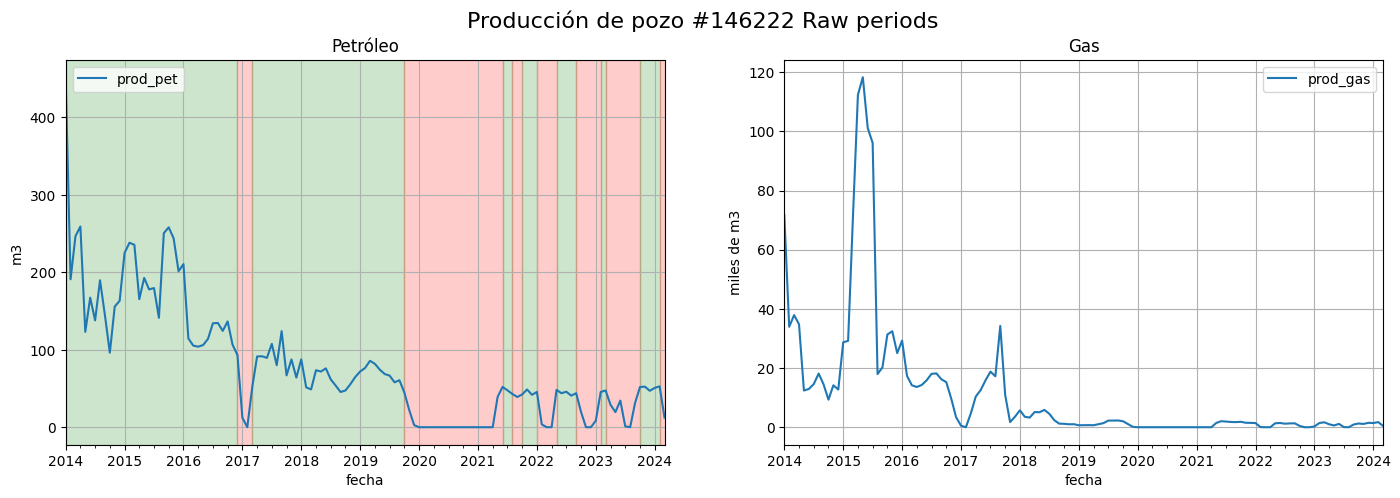

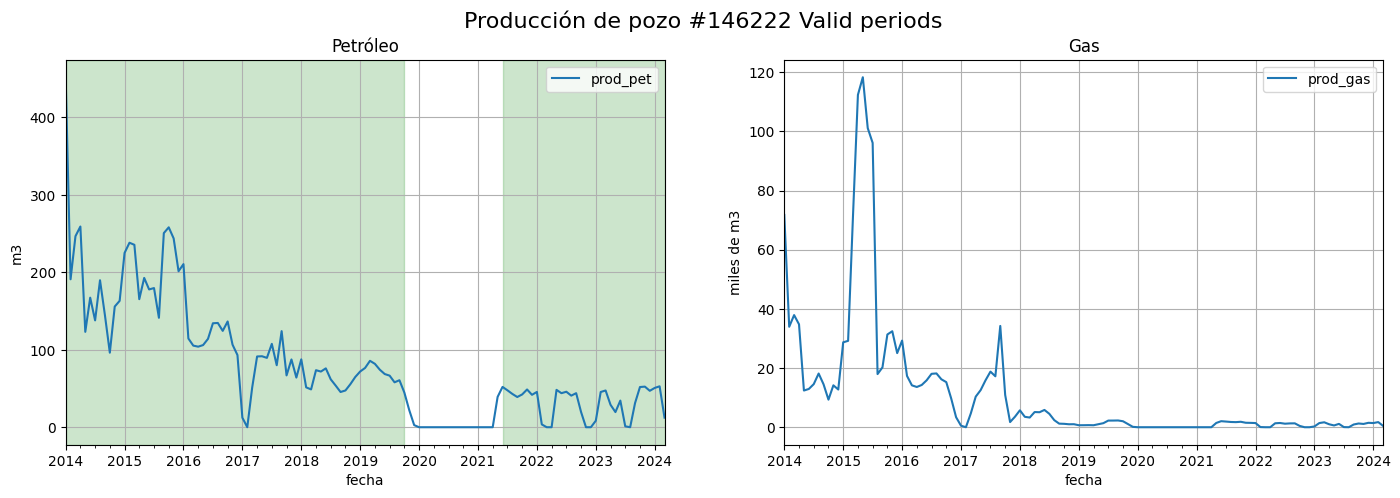

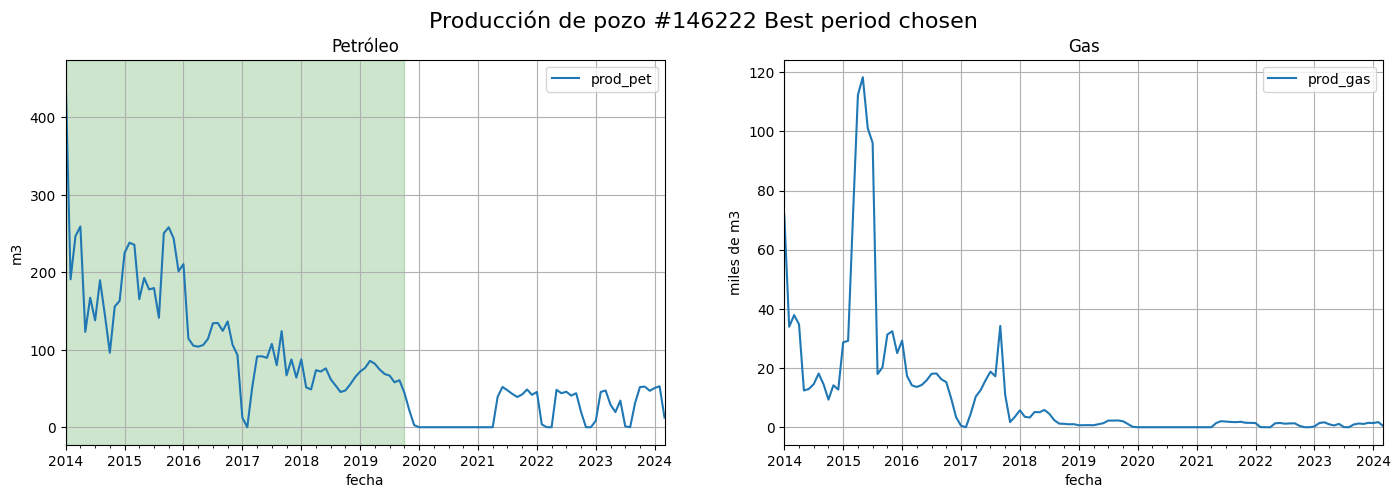

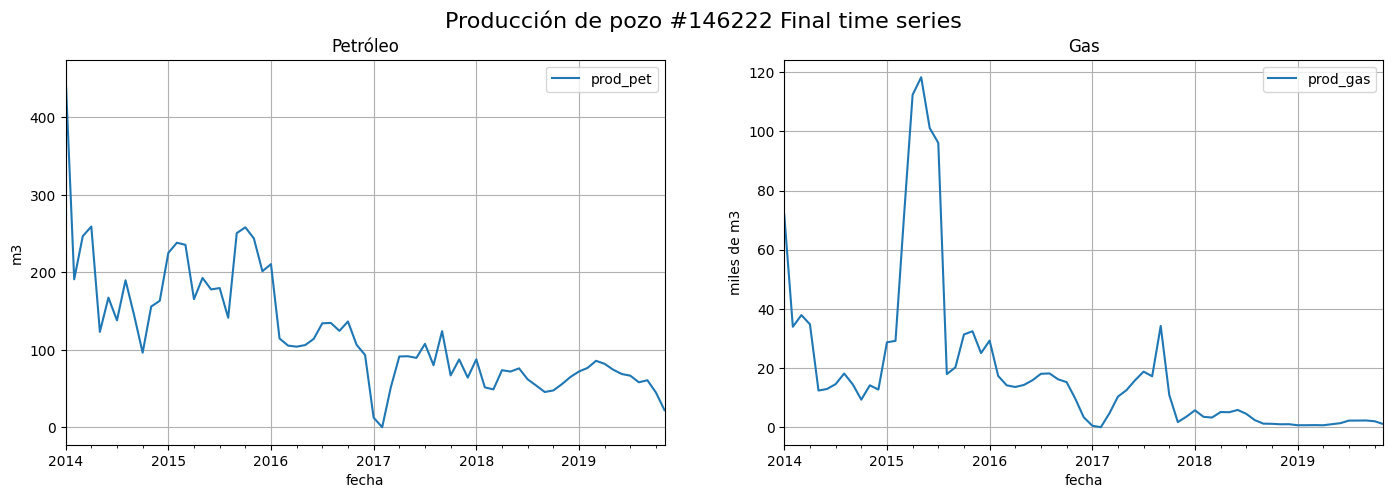

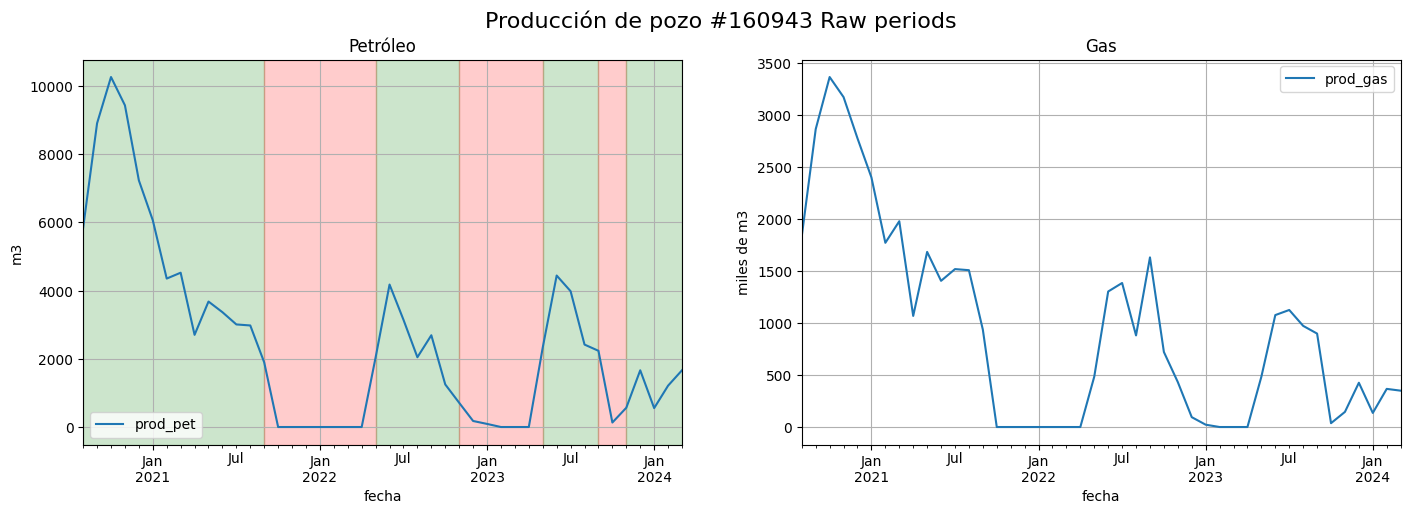

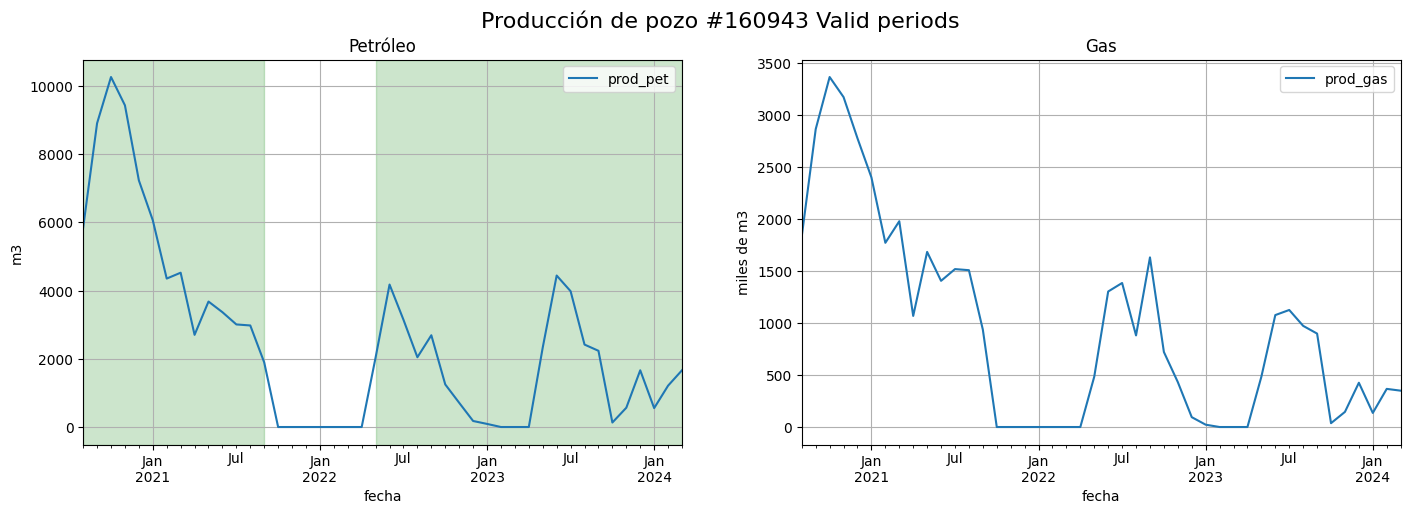

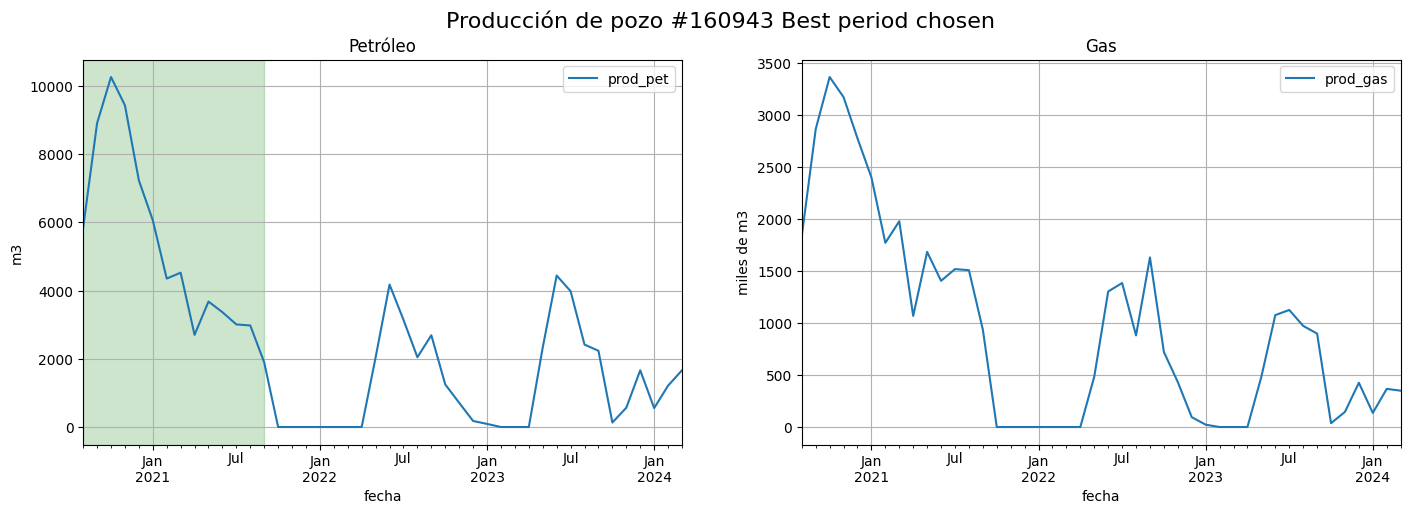

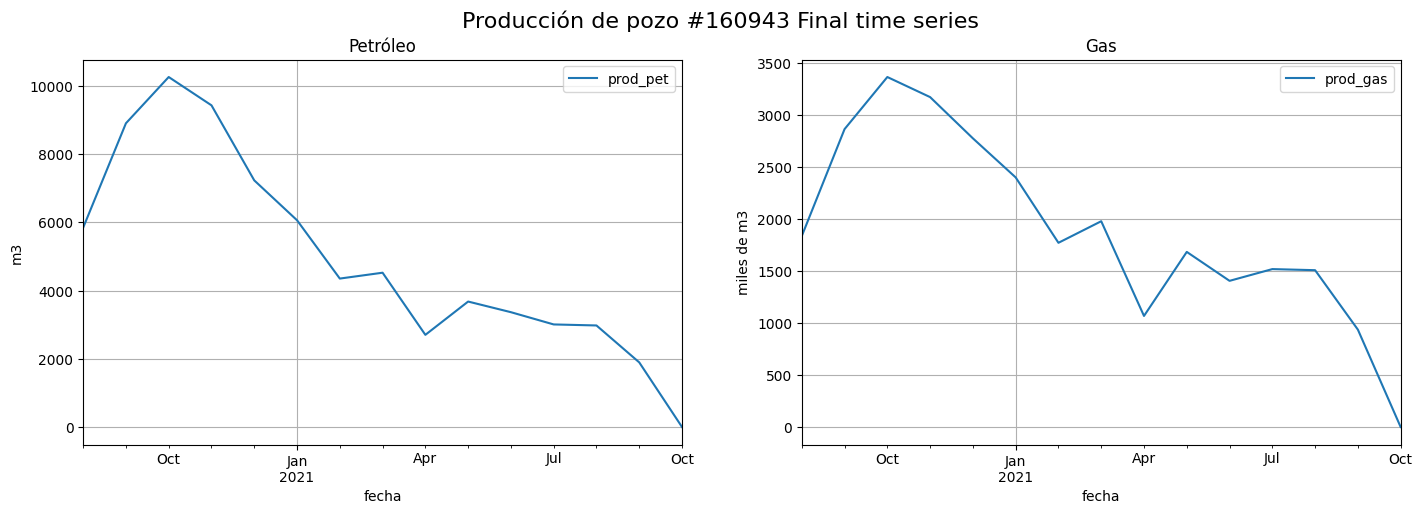

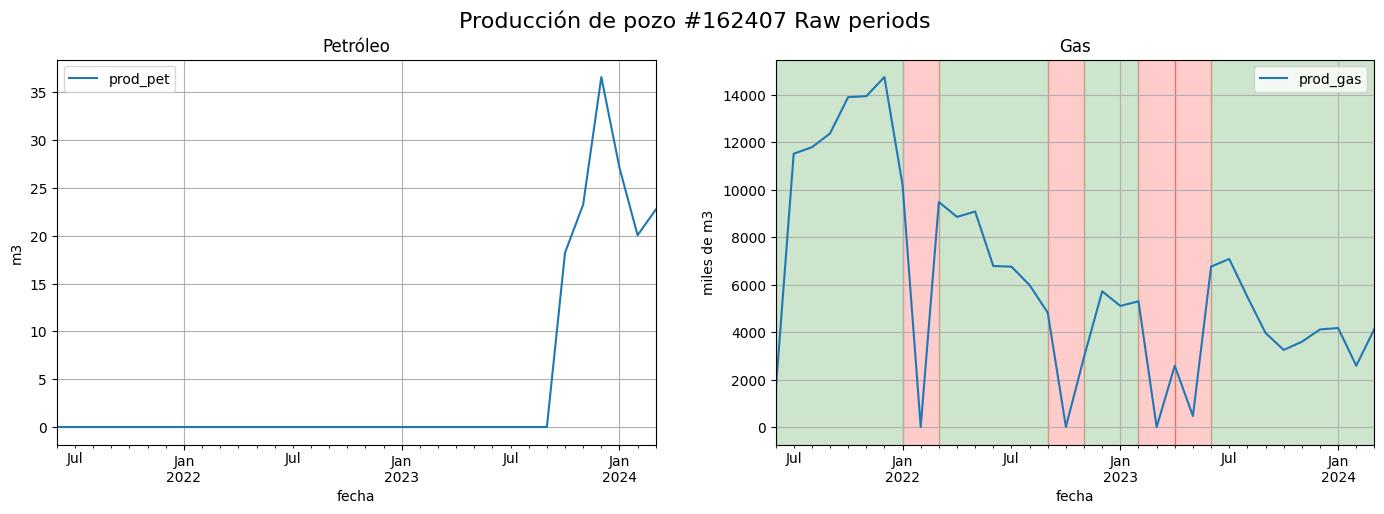

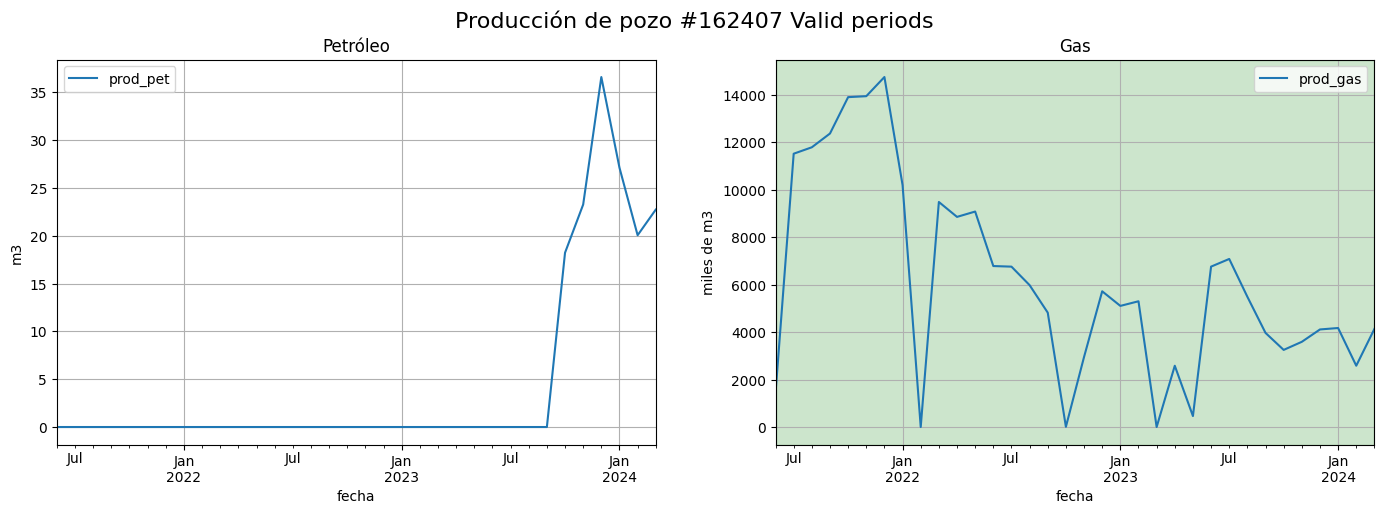

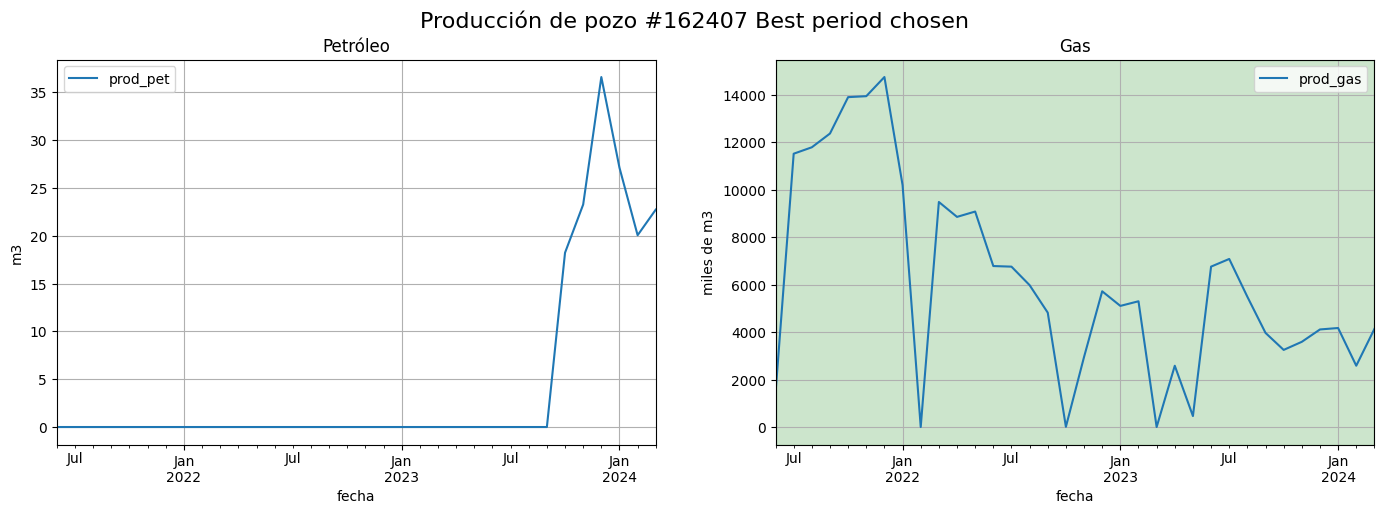

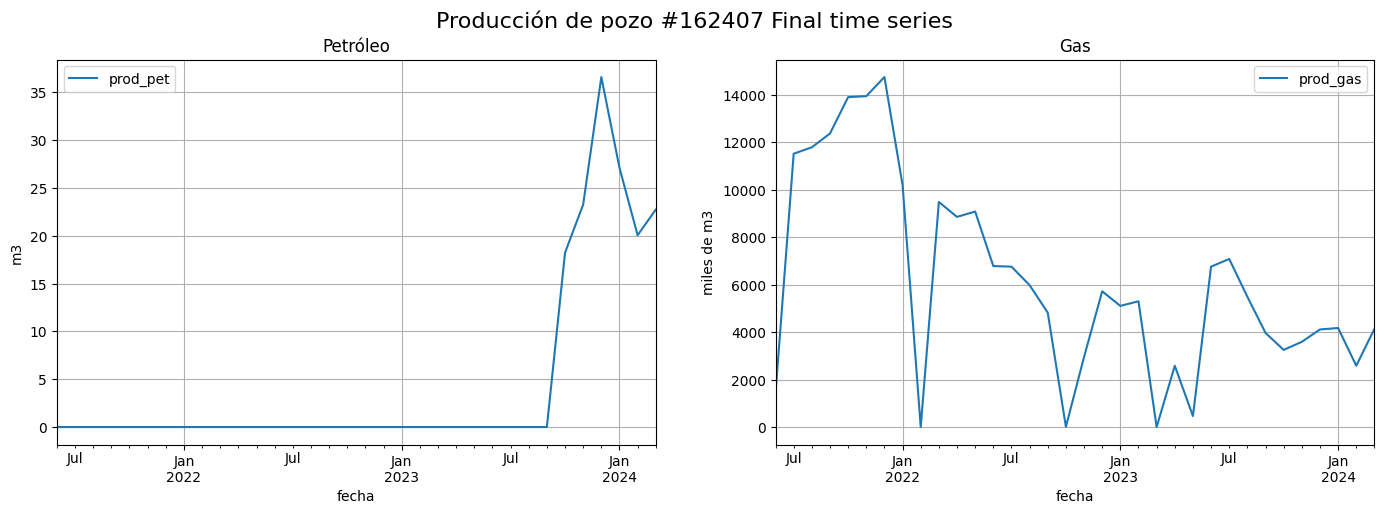

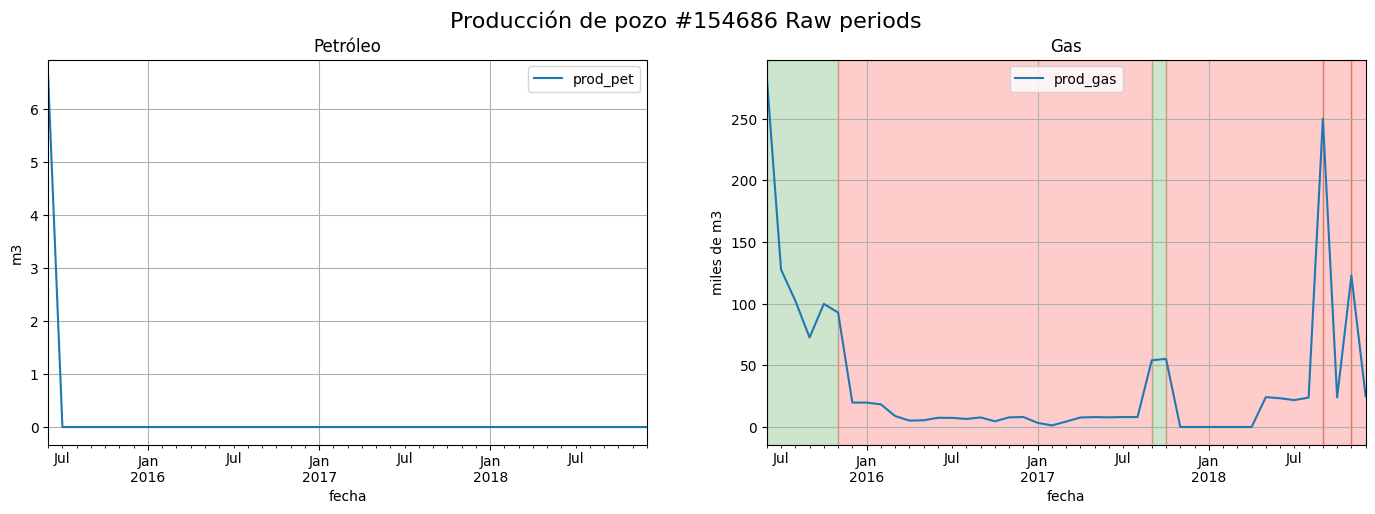

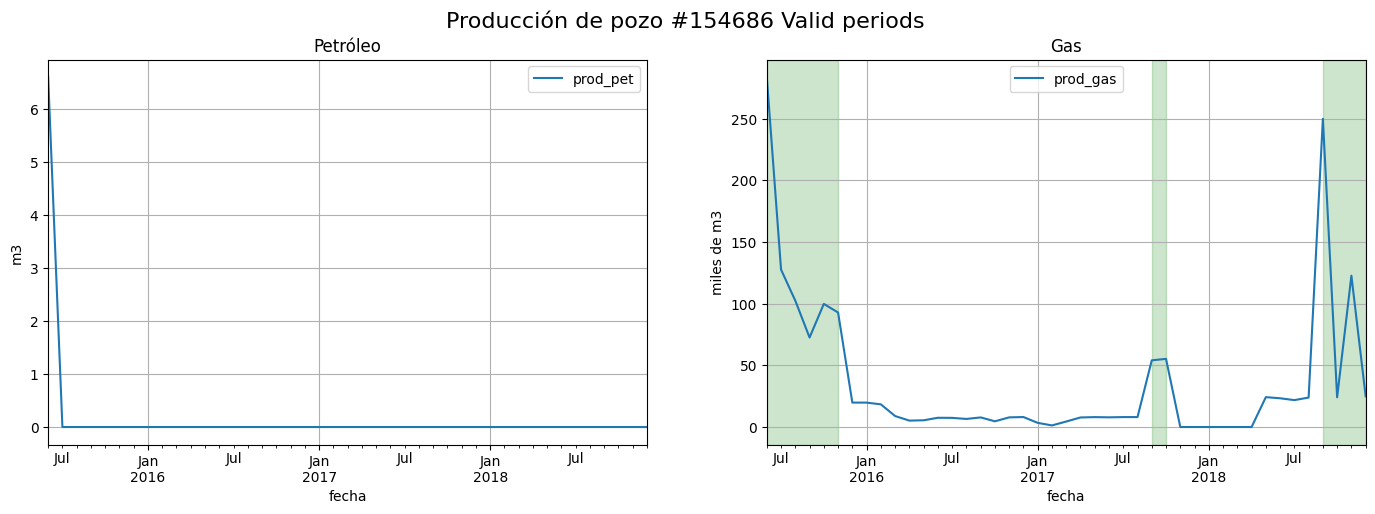

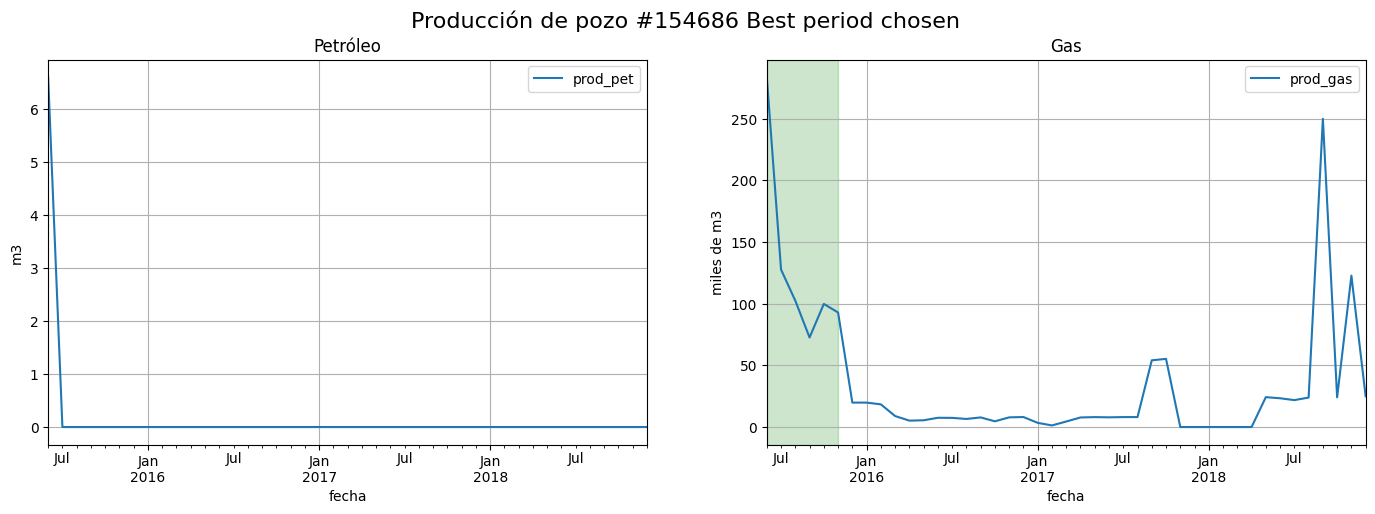

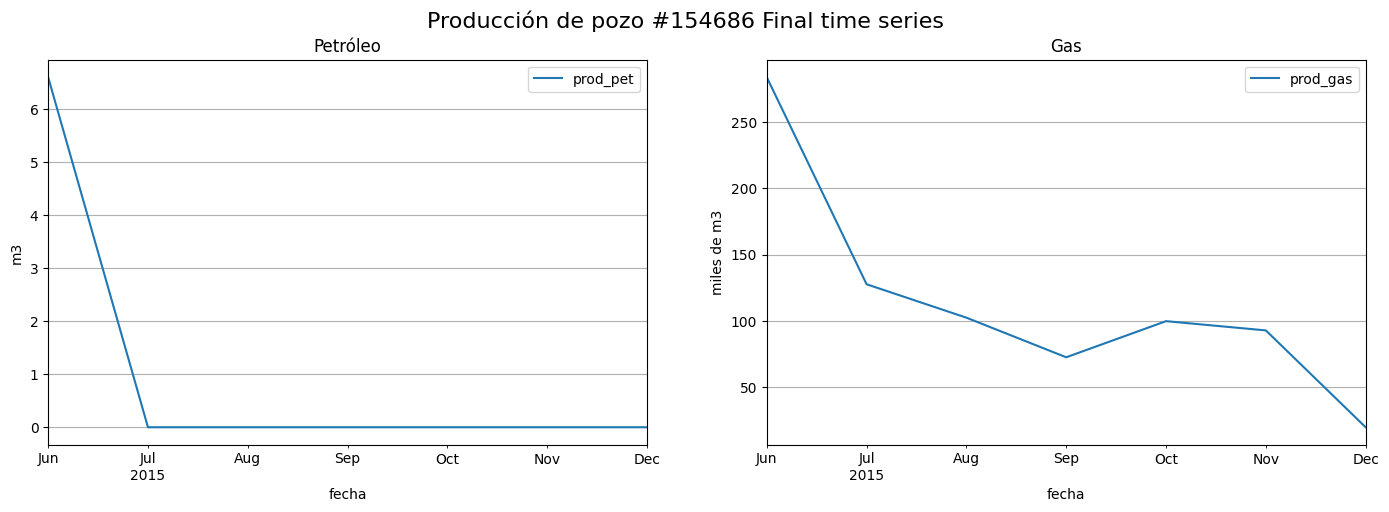

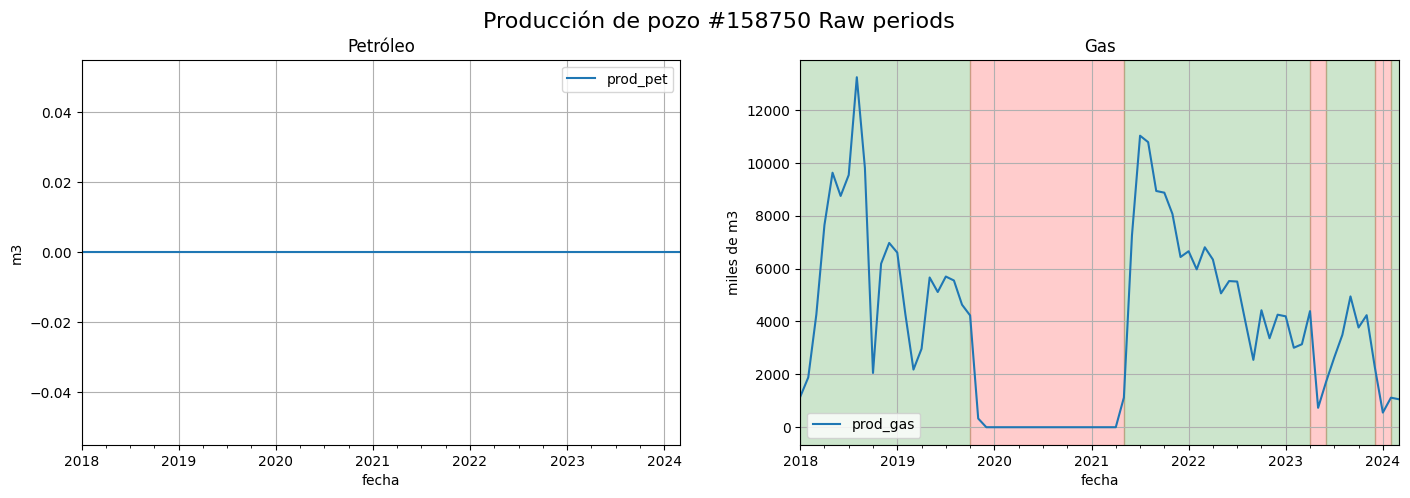

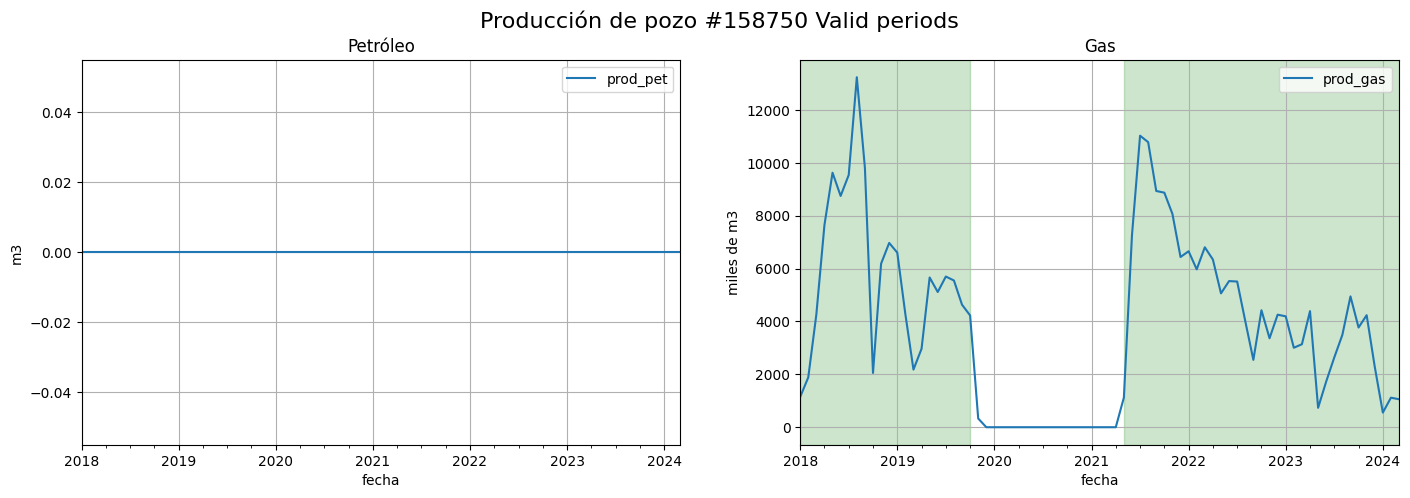

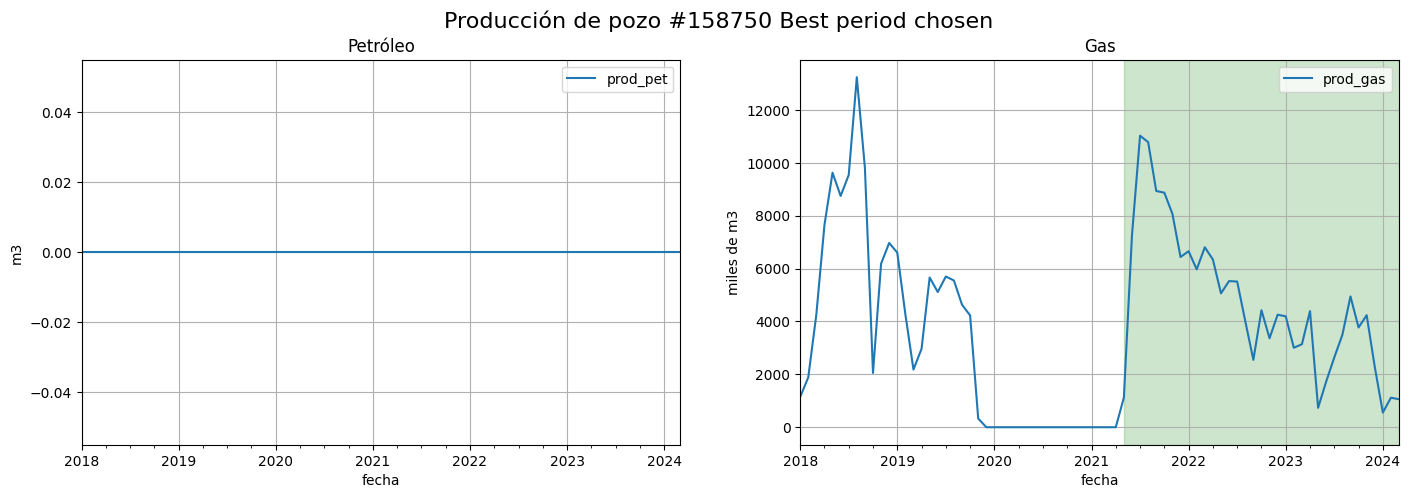

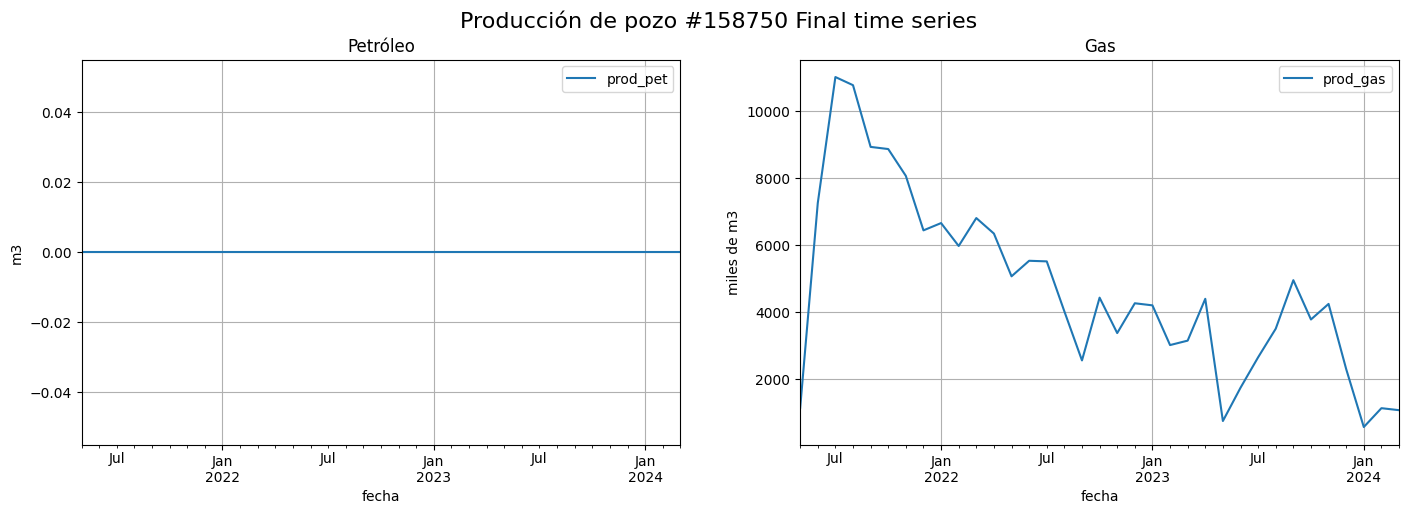

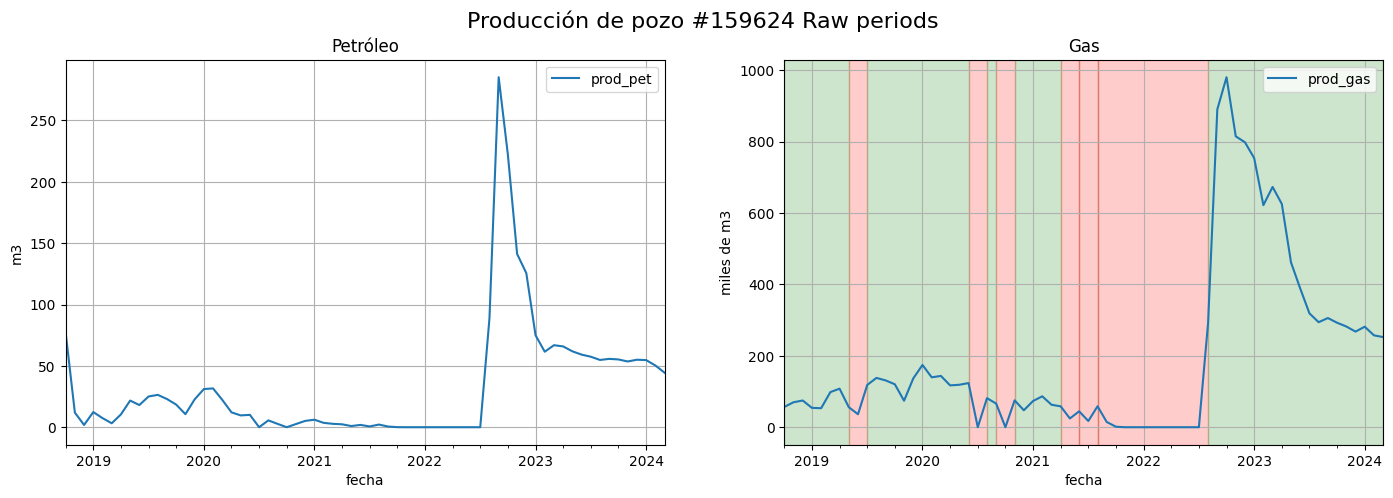

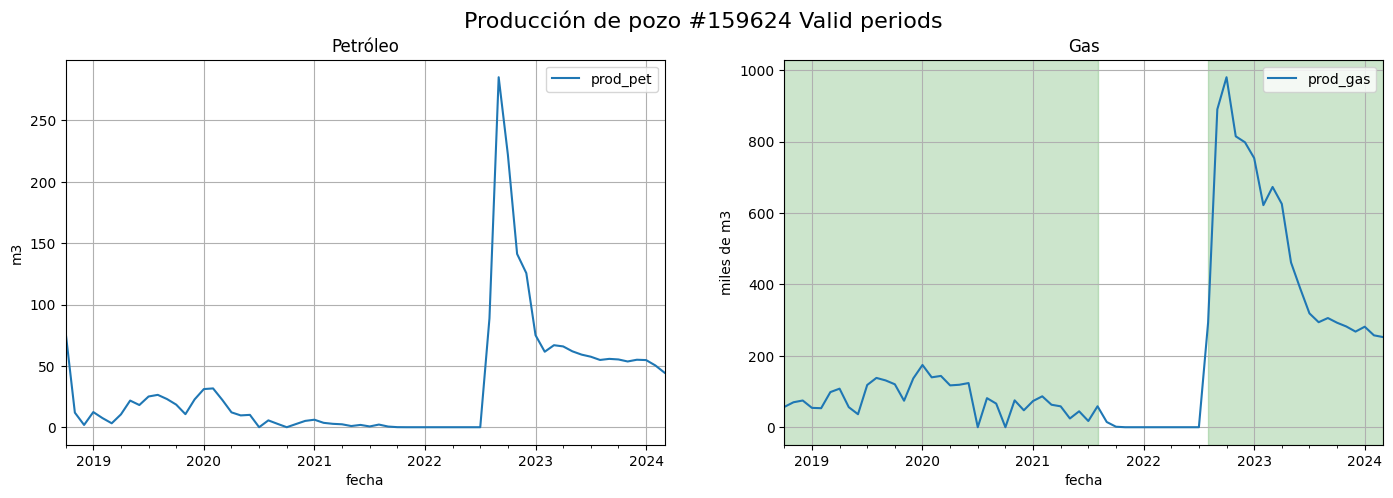

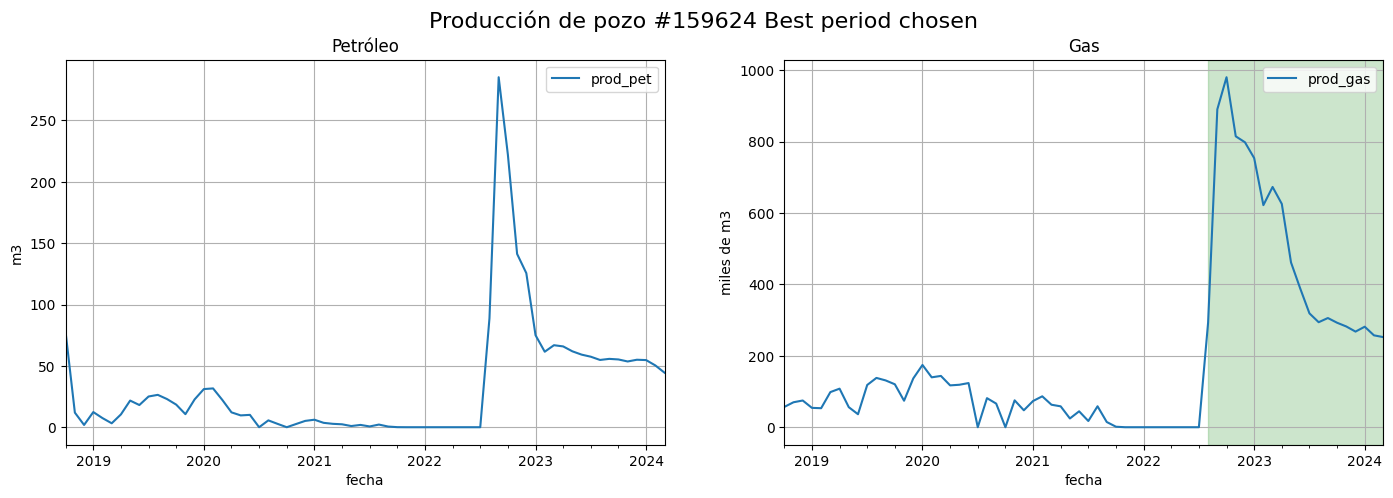

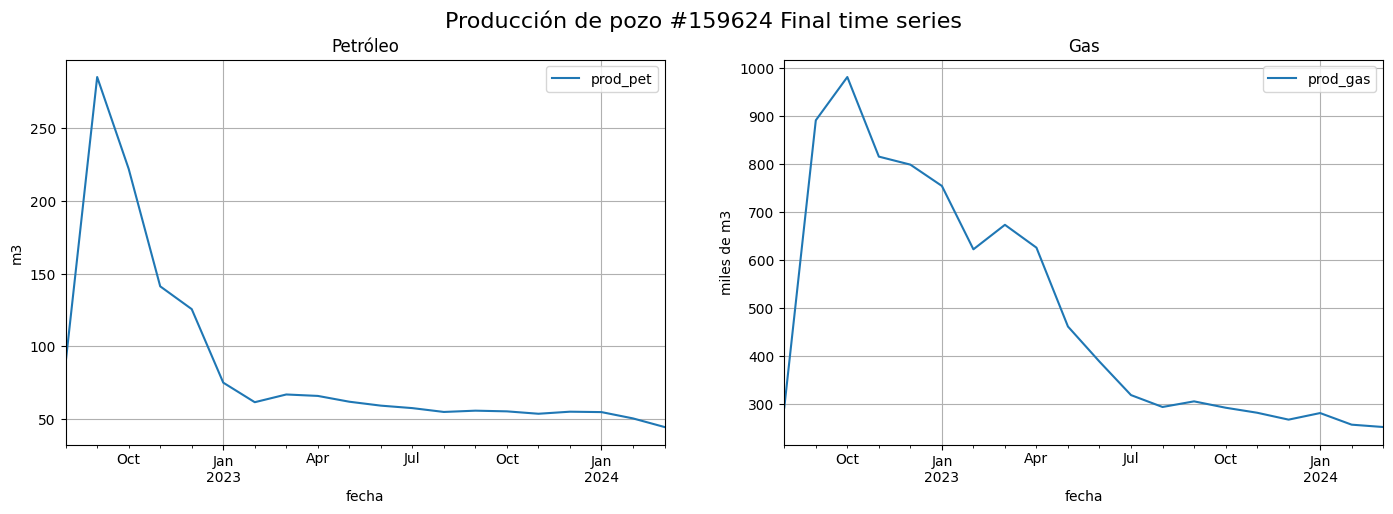

In [72]:
prod_data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)

# Showcase examples
for id in [146222, 160943, 162407, 154686, 158750, 159624]:
  prod_type = "pet" if get_well_id_type(id) == "Petrolífero" else "gas"

  axvspans = []
  raw_periods = find_well_id_zeros_raw_periods(id)
  for p in raw_periods:
    axvspans.append({"prod": prod_type,
                     "date_from": p.date_from - pd.DateOffset(months=1) if p.is_zero_period() else p.date_from,
                     "date_to": p.date_to + pd.DateOffset(months=1) if p.is_zero_period() else p.date_to,
                     "alpha": 0.2,
                     "color": "red" if p.is_zero_period() else "green"})
  plot_well_id(id, desc="Raw periods", axvspans=axvspans)

  axvspans = []
  valid_periods = filter_well_id_zeros_periods(id, raw_periods)
  for p in valid_periods:
    axvspans.append({"prod": prod_type, "date_from": p.date_from, "date_to": p.date_to, "alpha": 0.2, "color": "green"})
  plot_well_id(id, desc="Valid periods", axvspans=axvspans)

  axvspans = []
  best_period = get_best_well_id_period(id, valid_periods)
  axvspans.append({"prod": prod_type, "date_from": best_period.date_from, "date_to": best_period.date_to, "alpha": 0.2, "color": "green"})
  plot_well_id(id, desc="Best period chosen", axvspans=axvspans)

  axvspans = []
  deleted_entries = apply_well_id_best_period(id, best_period)
  plot_well_id(id, desc="Final time series", axvspans=axvspans)

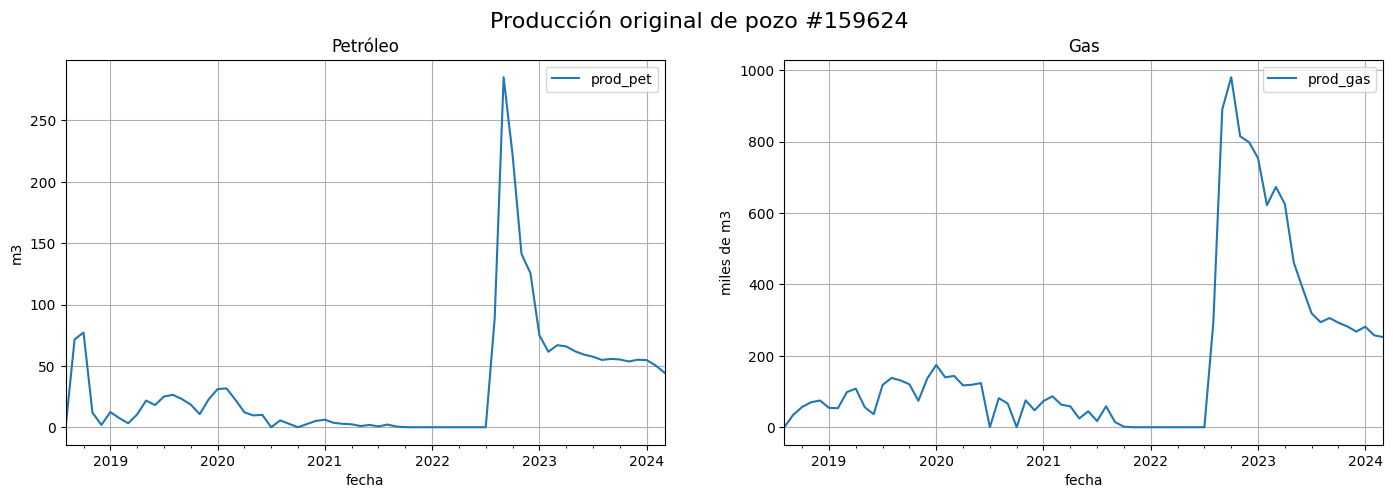

In [78]:
plot_original_data_well_id(159624)

#### Se aplica a la totalidad de pozos

In [74]:
%%time

# Sorted by date is necessary condition
prod_data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)
wells_ids = prod_data['idpozo'].value_counts().index.to_list()

print("Filtering wells zeros periods...\n")

removed_entries = 0
affected_wells = 0

for id in wells_ids:
  raw_periods = find_well_id_zeros_raw_periods(id)
  valid_periods = filter_well_id_zeros_periods(id, raw_periods)
  best_period = get_best_well_id_period(id, valid_periods)
  deleted_entries = apply_well_id_best_period(id, best_period)

  removed_entries += deleted_entries
  affected_wells += 1 if deleted_entries > 0 else 0

print(f"\nTotal removed entries: {removed_entries}")
print(f"Total affected wells: {affected_wells}\n")

Filtering wells zeros periods...

Picking max_sum_period for well 146274 (35934.50 vs 11806.18 prod - 38 vs 53 len).
Picking max_sum_period for well 147153 (3600.77 vs 1679.03 prod - 28 vs 31 len).
Picking max_sum_period for well 147469 (13914.89 vs 2457.57 prod - 47 vs 61 len).
Picking max_sum_period for well 147479 (38955.10 vs 8087.67 prod - 52 vs 58 len).
Picking max_sum_period for well 147478 (87901.97 vs 32993.80 prod - 53 vs 58 len).
Picking max_sum_period for well 147631 (7358.98 vs 2209.52 prod - 20 vs 40 len).
Picking max_sum_period for well 153326 (3307.17 vs 807.59 prod - 17 vs 23 len).
Picking max_sum_period for well 153614 (17648.56 vs 5050.72 prod - 42 vs 58 len).
Picking max_sum_period for well 153801 (19918.64 vs 5172.80 prod - 41 vs 42 len).
Picking max_sum_period for well 154760 (18236.54 vs 9696.19 prod - 47 vs 52 len).
Picking max_sum_period for well 154759 (30143.26 vs 7862.19 prod - 41 vs 58 len).
Picking max_sum_period for well 155075 (4595.09 vs 1560.47 prod - 

### Se re-aplica filtro de leading & trailing zeros dado los cambios que se fueron realizando

In [75]:
%%time
remove_wells_zeros_ends(match_well_type=True)

Removing wells zeros ends...

Using 300.01 mean min criteria for well 153345
Using 51.74 mean min criteria for well 146226
Using 94.60 mean min criteria for well 146998
Using 84.87 mean min criteria for well 152873
Using 57.52 mean min criteria for well 153173
Using 366.39 mean min criteria for well 153893
Using 191.80 mean min criteria for well 155038
Using 137.46 mean min criteria for well 156756
Using 327.36 mean min criteria for well 155542
Using 107.24 mean min criteria for well 154212
Using 115.47 mean min criteria for well 156645
Using 179.56 mean min criteria for well 156327
Using 75.34 mean min criteria for well 147472
Using 263.51 mean min criteria for well 156902
Using 297.80 mean min criteria for well 153485
Using 125.37 mean min criteria for well 155836
Using 81.13 mean min criteria for well 153227
Using 71.33 mean min criteria for well 156285
Using 98.05 mean min criteria for well 154929
Using 81.76 mean min criteria for well 157061
Using 64.85 mean min criteria for well 

### Se re-aplica filtro de cantidad mínima de entradas dado los cambios que se fueron realizando

In [76]:
# Eliminamos pozos con cantidad total de entradas menor a MIN_MONTHLY_ENTRIES_COUNT meses
remove_wells_by_min_entries_count(min_entries_count=MIN_MONTHLY_ENTRIES_COUNT)

Filtering wells with less than 9 entries...


Deleted 10 wells ids: [146776, 153313, 154223, 154686, 155712, 159031, 159587, 159866, 160557, 163527]



### Se re-aplica filtro de totalidad de entradas de producción cero (o ~cero)

In [79]:
filter_wells_with_zero_total_production(match_well_type=True)

Filtering wells with all production entries zero or ~zero...

Empty DataFrame
Columns: [prod_pet]
Index: []

Empty DataFrame
Columns: [prod_gas]
Index: []

Deleted 0 wells ids: []



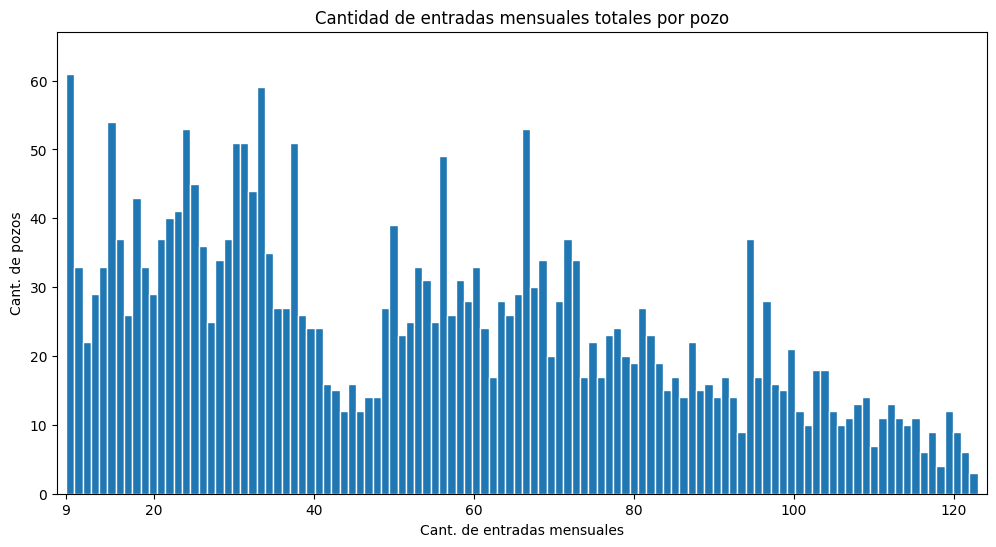

In [148]:
# histograma de cantidad de entradas mensuales totales por pozo
prod_data.groupby(["idpozo"])[["fecha"]].count().hist(grid=False, bins=110, edgecolor='white', figsize=(12, 6))
plt.xlabel("Cant. de entradas mensuales")
plt.ylabel("Cant. de pozos")
plt.title('Cantidad de entradas mensuales totales por pozo')
plt.margins(x=0.01, y=0.1)
plt.xticks(np.insert(np.arange(20, 125, 20), 0, 9))
plt.show()

# Data export

In [ ]:
data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)
prod_data.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)

# Get only resulting prod_data entries
valid_entries_to_export = prod_data.sort_index().index

# Take only resulting prod_data records from data and remove the others
data_to_export = data.loc[valid_entries_to_export]

# Sort just in case previous loc search unsorts it
data_to_export.sort_values(by=['fecha', 'idpozo'], ascending=True, inplace=True)

# Overwrite all data in prod_data columns with prod_data values
data_to_export.loc[:, prod_data.columns.to_list()] = prod_data

# Reset index to ordered 0 to N values
data_to_export.reset_index(drop=True, inplace=True)

# Export to csv prod_norm_date file
data_to_export.to_csv("/content/drive/MyDrive/Trabajo profesional/Code/data/prod_clean" + datetime.now().strftime("_%Y-%m-%d_%H:%M:%S") + ".csv")

del(valid_entries_to_export)
del(data_to_export)